First I downloaded the dataset from Kaggle
and this is link of dataset {https://www.kaggle.com/datasets/kunwarakash/chennai-housing-sales-price}

Simple linear regression has just one feature and one target but Multiple linear regression has multiple features and one target also

Every feature can change the price of the house, such as the age of the house when increases the age decreases, the price of the house, and the features of the house, such as the garden and the nearby centers it

import important libraries

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures, RobustScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')
# expending the display options to show all columns
pd.set_option('display.max_columns', None)

In [82]:
# read csv file and save it in home_price
try:
    home_price = pd.read_csv('Chennai houseing sale.csv')
except FileNotFoundError:
    print("File not found. Please check the file path and name.")

In [83]:
# check head
home_price.head()

PRT_ID        AREA  INT_SQFT   DATE_SALE  DIST_MAINROAD  N_BEDROOM  \
0  P03210  Karapakkam      1004    4/5/2011            131        1.0   
1  P09411  Anna Nagar      1986  19-12-2006             26        2.0   
2  P01812       Adyar       909    4/2/2012             70        1.0   
3  P05346   Velachery      1855  13-03-2010             14        3.0   
4  P06210  Karapakkam      1226   5/10/2009             84        1.0   

   N_BATHROOM  N_ROOM SALE_COND PARK_FACIL  DATE_BUILD   BUILDTYPE  \
0         1.0       3  AbNormal        Yes  15-05-1967  Commercial   
1         1.0       5  AbNormal         No  22-12-1995  Commercial   
2         1.0       3  AbNormal        Yes    9/2/1992  Commercial   
3         2.0       5    Family         No  18-03-1988      Others   
4         1.0       3  AbNormal        Yes  13-10-1979      Others   

  UTILITY_AVAIL  STREET MZZONE  QS_ROOMS  QS_BATHROOM  QS_BEDROOM  QS_OVERALL  \
0        AllPub   Paved      A       4.0          3.9         4.9       4.330   
1        AllPub  Gravel     RH       4.9          4.2         2.5       3.765   
2           ELO  Gravel     RL       4.1          3.8         2.2       3.090   
3       NoSewr    Paved      I       4.7          3.9         3.6       4.010   
4        AllPub  Gravel      C       3.0          2.5         4.1       3.290   

   REG_FEE  COMMIS  SALES_PRICE  
0   380000  144400      7600000  
1   760122  304049     21717770  
2   421094   92114     13159200  
3   356321   77042      9630290  
4   237000   74063      7406250

In [84]:
# get more information about dataset
home_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PRT_ID         7109 non-null   object 
 1   AREA           7109 non-null   object 
 2   INT_SQFT       7109 non-null   int64  
 3   DATE_SALE      7109 non-null   object 
 4   DIST_MAINROAD  7109 non-null   int64  
 5   N_BEDROOM      7108 non-null   float64
 6   N_BATHROOM     7104 non-null   float64
 7   N_ROOM         7109 non-null   int64  
 8   SALE_COND      7109 non-null   object 
 9   PARK_FACIL     7109 non-null   object 
 10  DATE_BUILD     7109 non-null   object 
 11  BUILDTYPE      7109 non-null   object 
 12  UTILITY_AVAIL  7109 non-null   object 
 13  STREET         7109 non-null   object 
 14  MZZONE         7109 non-null   object 
 15  QS_ROOMS       7109 non-null   float64
 16  QS_BATHROOM    7109 non-null   float64
 17  QS_BEDROOM     7109 non-null   float64
 18  QS_OVERA

In [85]:
# display some statistics
home_price.describe()

INT_SQFT  DIST_MAINROAD    N_BEDROOM   N_BATHROOM       N_ROOM  \
count  7109.000000    7109.000000  7108.000000  7104.000000  7109.000000   
mean   1382.073006      99.603179     1.637029     1.213260     3.688704   
std     457.410902      57.403110     0.802902     0.409639     1.019099   
min     500.000000       0.000000     1.000000     1.000000     2.000000   
25%     993.000000      50.000000     1.000000     1.000000     3.000000   
50%    1373.000000      99.000000     1.000000     1.000000     4.000000   
75%    1744.000000     148.000000     2.000000     1.000000     4.000000   
max    2500.000000     200.000000     4.000000     2.000000     6.000000   

          QS_ROOMS  QS_BATHROOM   QS_BEDROOM   QS_OVERALL        REG_FEE  \
count  7109.000000  7109.000000  7109.000000  7061.000000    7109.000000   
mean      3.517471     3.507244     3.485300     3.503254  376938.330708   
std       0.891972     0.897834     0.887266     0.527223  143070.662010   
min       2.000000     2.000000     2.000000     2.000000   71177.000000   
25%       2.700000     2.700000     2.700000     3.130000  272406.000000   
50%       3.500000     3.500000     3.500000     3.500000  349486.000000   
75%       4.300000     4.300000     4.300000     3.890000  451562.000000   
max       5.000000     5.000000     5.000000     4.970000  983922.000000   

              COMMIS   SALES_PRICE  
count    7109.000000  7.109000e+03  
mean   141005.726544  1.089491e+07  
std     78768.093718  3.768603e+06  
min      5055.000000  2.156875e+06  
25%     84219.000000  8.272100e+06  
50%    127628.000000  1.033505e+07  
75%    184506.000000  1.299390e+07  
max    495405.000000  2.366734e+07

## Data cleaning and processing

### find tha Nan and edit it

In [86]:
# check for null values percentage in each column
for col in home_price.columns:
    if home_price[col].isnull().sum() > 0:
        print(f"Column '{col}' has {home_price[col].isnull().sum()} null values, which is {home_price[col].isnull().sum()/home_price.shape[0] * 100:.2f}% of the total data.")

Column 'N_BEDROOM' has 1 null values, which is 0.01% of the total data.
Column 'N_BATHROOM' has 5 null values, which is 0.07% of the total data.
Column 'QS_OVERALL' has 48 null values, which is 0.68% of the total data.


<Axes: >

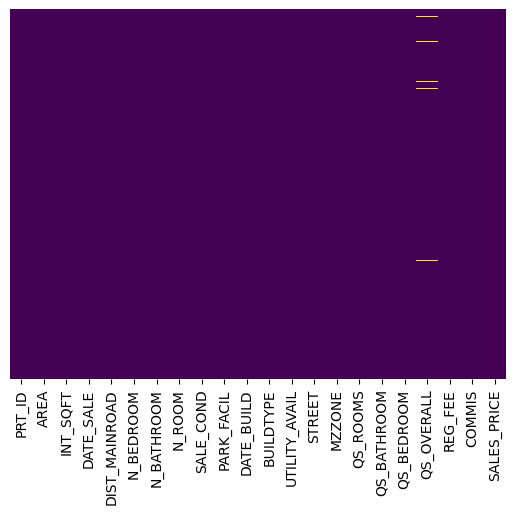

In [87]:
sns.heatmap(home_price.isnull(), yticklabels=False,cbar=False,cmap='viridis')

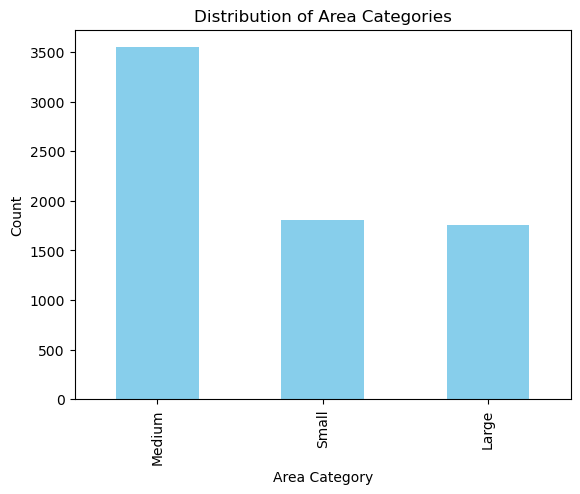

In [88]:
# classify the area of house into 3 categories
def area_category(area):
    if area < 1000:
        return 'Small'
    elif area <= 1750:
        return 'Medium'
    else:
        return 'Large'
home_price['AREA_CATEGORY'] = home_price['INT_SQFT'].apply(area_category)
# check the distribution of area categories
home_price['AREA_CATEGORY'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribution of Area Categories')
plt.xlabel('Area Category')
plt.ylabel('Count')
plt.show()

In [89]:
home_price[home_price['N_BEDROOM'].isnull()][["AREA", "AREA_CATEGORY", "N_BEDROOM"]]

AREA AREA_CATEGORY  N_BEDROOM
4060  Anna Nagar        Medium        NaN

In [90]:
home_price[(home_price['AREA'] == 'Anna Nagar') & (home_price["AREA_CATEGORY"] == "Medium")]["N_BEDROOM"].mean()

1.0

In [91]:
# there is one missing row
home_price['N_BEDROOM'].fillna(1, inplace=True)

In [92]:
home_price[home_price['QS_OVERALL'].isnull()][["AREA", "AREA_CATEGORY", "QS_OVERALL"]]

AREA AREA_CATEGORY  QS_OVERALL
15     Velachery         Large         NaN
46       T Nagar         Large         NaN
86      Chrompet        Medium         NaN
111        Adyar        Medium         NaN
134      T Nagar         Large         NaN
143   Karapakkam        Medium         NaN
161    Velachery         Large         NaN
186        Adyar         Small         NaN
208   Karapakkam        Medium         NaN
248    Velachery         Large         NaN
261        Adyar        Medium         NaN
284     KK Nagar        Medium         NaN
312     KK Nagar         Large         NaN
329   Anna Nagar        Medium         NaN
355     KK Nagar        Medium         NaN
402   Karapakkam        Medium         NaN
437     KK Nagar        Medium         NaN
479   Karapakkam         Small         NaN
513   Anna Nagar         Large         NaN
624   Karapakkam        Medium         NaN
625   Anna Nagar        Medium         NaN
714   Anna Nagar         Large         NaN
769     Chrompet         Small         NaN
822     Chrompet        Medium         NaN
899     KK Nagar        Medium         NaN
955     Chrompet         Small         NaN
993      T Nagar        Medium         NaN
1044    KK Nagar         Large         NaN
1142    KK Nagar         Large         NaN
1206  Anna Nagar         Large         NaN
1393  Anna Nagar         Large         NaN
1447    Chrompet        Medium         NaN
1528  Anna Nagar         Large         NaN
2196     T Nagar        Medium         NaN
2227    Chrompet        Medium         NaN
2228    Chrompet        Medium         NaN
2336   Velachery        Medium         NaN
3870   Velachery         Large         NaN
4329  Anna Nagar         Large         NaN
4836   Velachery        Medium         NaN
5104    Chrompet        Medium         NaN
5458     T Nagar        Medium         NaN
5463       Adyar        Medium         NaN
6111  Karapakkam         Small         NaN
6134    Chormpet         Small         NaN
6161       Adyar        Medium         NaN
6248  Karapakkam         Small         NaN
6855     T Nagar        Medium         NaN

In [93]:
for i in home_price[home_price['QS_OVERALL'].isnull()].index:
    area, area_category = home_price.loc[i, ["AREA", "AREA_CATEGORY"]].values
    home_price.loc[i, "QS_OVERALL"] = home_price[(home_price['AREA'] == area) & (home_price["AREA_CATEGORY"] == area_category)]["QS_OVERALL"].mean()

In [94]:
home_price[home_price['N_BATHROOM'].isnull()][["AREA", "AREA_CATEGORY", "N_BATHROOM"]]

AREA AREA_CATEGORY  N_BATHROOM
70    Anna Nagar        Medium         NaN
5087    Chrompet        Medium         NaN
6134    Chormpet         Small         NaN
6371    Chrompet        Medium         NaN
6535  Anna Nagar         Large         NaN

In [95]:
for i in home_price[home_price['N_BATHROOM'].isnull()].index:
    area, area_category = home_price.loc[i, ["AREA", "AREA_CATEGORY"]].values
    home_price.loc[i, "N_BATHROOM"] = int(home_price[(home_price['AREA'] == area) & (home_price["AREA_CATEGORY"] == area_category)]["N_BATHROOM"].mean())

In [96]:
home_price['N_BATHROOM'].value_counts()

N_BATHROOM
1.0    5594
2.0    1515
Name: count, dtype: int64

<Axes: >

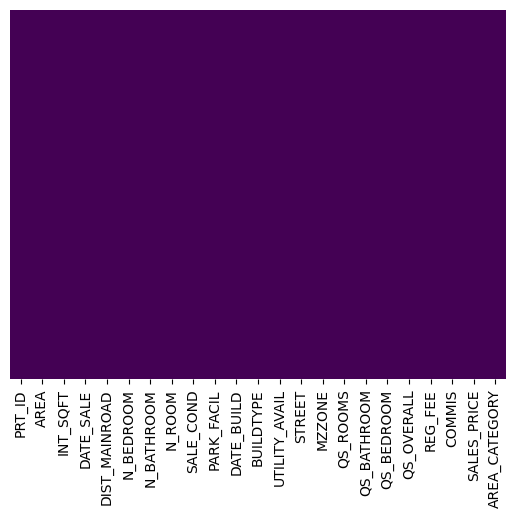

In [97]:
sns.heatmap(home_price.isnull(), yticklabels=False,cbar=False,cmap='viridis')

### preprocessing the data and fix the data types

In [98]:
# edit type of columns
home_price = home_price.astype({'N_BEDROOM':'int32', 'N_BATHROOM':'int32', 'SALES_PRICE':'float32'}, copy=False)

In [99]:
home_price.head(2)

PRT_ID        AREA  INT_SQFT   DATE_SALE  DIST_MAINROAD  N_BEDROOM  \
0  P03210  Karapakkam      1004    4/5/2011            131          1   
1  P09411  Anna Nagar      1986  19-12-2006             26          2   

   N_BATHROOM  N_ROOM SALE_COND PARK_FACIL  DATE_BUILD   BUILDTYPE  \
0           1       3  AbNormal        Yes  15-05-1967  Commercial   
1           1       5  AbNormal         No  22-12-1995  Commercial   

  UTILITY_AVAIL  STREET MZZONE  QS_ROOMS  QS_BATHROOM  QS_BEDROOM  QS_OVERALL  \
0        AllPub   Paved      A       4.0          3.9         4.9       4.330   
1        AllPub  Gravel     RH       4.9          4.2         2.5       3.765   

   REG_FEE  COMMIS  SALES_PRICE AREA_CATEGORY  
0   380000  144400    7600000.0        Medium  
1   760122  304049   21717770.0         Large

In [100]:
home_price = home_price.astype({'AREA':'category', 'AREA_CATEGORY':'category', 'SALE_COND':'category', 'BUILDTYPE':'category', 'UTILITY_AVAIL': 'category', 'STREET': 'category', 'MZZONE': 'category'}, copy=False)

In [101]:
home_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   PRT_ID         7109 non-null   object  
 1   AREA           7109 non-null   category
 2   INT_SQFT       7109 non-null   int64   
 3   DATE_SALE      7109 non-null   object  
 4   DIST_MAINROAD  7109 non-null   int64   
 5   N_BEDROOM      7109 non-null   int32   
 6   N_BATHROOM     7109 non-null   int32   
 7   N_ROOM         7109 non-null   int64   
 8   SALE_COND      7109 non-null   category
 9   PARK_FACIL     7109 non-null   object  
 10  DATE_BUILD     7109 non-null   object  
 11  BUILDTYPE      7109 non-null   category
 12  UTILITY_AVAIL  7109 non-null   category
 13  STREET         7109 non-null   category
 14  MZZONE         7109 non-null   category
 15  QS_ROOMS       7109 non-null   float64 
 16  QS_BATHROOM    7109 non-null   float64 
 17  QS_BEDROOM     7109 non-null   fl

In [102]:
# find year form two columns DATE_BUILD and DATE_SALE
def find_age():

        home_age = []
        for i in range(len(home_price['DATE_BUILD'])):

                if '-' in home_price.loc[i,'DATE_BUILD']:
                        dt = home_price.loc[i,'DATE_BUILD'].split('-')[2]
                elif '/' in home_price.loc[i,'DATE_BUILD']:
                        dt = home_price.loc[i,'DATE_BUILD'].split('/')[2]
                
                if '-' in home_price.loc[i,'DATE_SALE']:
                        ds = home_price.loc[i,'DATE_SALE'].split('-')[2]
                elif '/' in home_price.loc[i,'DATE_SALE']:
                        ds = home_price.loc[i,'DATE_SALE'].split('/')[2]

                home_age.append(int(ds) - int(dt))

        return home_age

In [103]:
# add new column
home_price['home_age'] = find_age()

## Check the values ​​and edit the mistakes

In [104]:
home_price['PARK_FACIL'].value_counts()

PARK_FACIL
Yes    3587
No     3520
Noo       2
Name: count, dtype: int64

In [105]:
# change value of PARK_FACIL to number
home_price['PARK_FACIL'] = ['No' if x == 'Noo' else x for x in home_price['PARK_FACIL']]
home_price['PARK_FACIL'] = home_price['PARK_FACIL'].astype('category', copy=False)

In [106]:
home_price['STREET'].value_counts()

STREET
Paved        2560
Gravel       2520
No Access    2010
Pavd           12
NoAccess        7
Name: count, dtype: int64

In [107]:
home_price['STREET'] = home_price['STREET'].apply(lambda x: x.replace('Pavd','Paved'))
home_price['STREET'] = home_price['STREET'].apply(lambda x: x.replace('NoAccess','No Access'))
home_price['STREET'] = home_price['STREET'].astype('category', copy=False)

In [108]:
home_price['STREET'].value_counts()

STREET
Paved        2572
Gravel       2520
No Access    2017
Name: count, dtype: int64

In [109]:
home_price['SALE_COND'].value_counts()

SALE_COND
AdjLand        1433
Partial        1429
Normal Sale    1423
AbNormal       1406
Family         1403
Adj Land          6
Ab Normal         5
Partiall          3
PartiaLl          1
Name: count, dtype: int64

In [110]:
home_price['SALE_COND'] = home_price['SALE_COND'].apply(lambda x: x.replace('Adj Land','AdjLand'))
home_price['SALE_COND'] = home_price['SALE_COND'].apply(lambda x: x.replace('Ab Normal','AbNormal'))
home_price['SALE_COND'] = home_price['SALE_COND'].apply(lambda x: x.replace('Partiall','Partial'))
home_price['SALE_COND'] = home_price['SALE_COND'].apply(lambda x: x.replace('PartiaLl','Partial'))
home_price['SALE_COND'] = home_price['SALE_COND'].astype('category', copy=False)

In [111]:
home_price['SALE_COND'].value_counts()

SALE_COND
AdjLand        1439
Partial        1433
Normal Sale    1423
AbNormal       1411
Family         1403
Name: count, dtype: int64

In [112]:
home_price['AREA'].value_counts()

AREA
Chrompet      1681
Karapakkam    1363
KK Nagar       996
Velachery      979
Anna Nagar     783
Adyar          773
T Nagar        496
Chrompt          9
Chrmpet          6
Chormpet         6
TNagar           5
Karapakam        3
Ana Nagar        3
Ann Nagar        2
Velchery         2
Adyr             1
KKNagar          1
Name: count, dtype: int64

In [113]:
home_price['AREA'] = home_price['AREA'].apply(lambda x: x.replace('Chrompt','Chrompet'))
home_price['AREA'] = home_price['AREA'].apply(lambda x: x.replace('Chrmpet','Chrompet'))
home_price['AREA'] = home_price['AREA'].apply(lambda x: x.replace('Chormpet','Chrompet'))
home_price['AREA'] = home_price['AREA'].apply(lambda x: x.replace('Karapakam','Karapakkam'))
home_price['AREA'] = home_price['AREA'].apply(lambda x: x.replace('KKNagar','KK Nagar'))
home_price['AREA'] = home_price['AREA'].apply(lambda x: x.replace('Velchery','Velachery'))
home_price['AREA'] = home_price['AREA'].apply(lambda x: x.replace('Ana Nagar','Anna Nagar'))
home_price['AREA'] = home_price['AREA'].apply(lambda x: x.replace('Ann Nagar','Anna Nagar'))
home_price['AREA'] = home_price['AREA'].apply(lambda x: x.replace('Adyr','Adyar'))
home_price['AREA'] = home_price['AREA'].apply(lambda x: x.replace('TNagar','T Nagar'))
home_price['AREA'] = home_price['AREA'].astype('category', copy=False)

In [114]:
home_price['AREA'].value_counts()

AREA
Chrompet      1702
Karapakkam    1366
KK Nagar       997
Velachery      981
Anna Nagar     788
Adyar          774
T Nagar        501
Name: count, dtype: int64

In [115]:
home_price['BUILDTYPE'].value_counts()

BUILDTYPE
House         2444
Others        2336
Commercial    2325
Comercial        4
Name: count, dtype: int64

In [116]:
home_price['BUILDTYPE'] = home_price['BUILDTYPE'].apply(lambda x: x.replace('Comercial','Commercial'))
home_price['BUILDTYPE'] = home_price['BUILDTYPE'].astype('category', copy=False)

In [117]:
home_price['BUILDTYPE'].value_counts()

BUILDTYPE
House         2444
Others        2336
Commercial    2329
Name: count, dtype: int64

In [118]:
home_price['UTILITY_AVAIL'].value_counts()

UTILITY_AVAIL
AllPub     1886
NoSeWa     1871
NoSewr     1829
ELO        1522
All Pub       1
Name: count, dtype: int64

In [119]:
home_price['UTILITY_AVAIL'] = home_price['UTILITY_AVAIL'].apply(lambda x: x.replace('All Pub','AllPub'))
home_price['UTILITY_AVAIL'] = home_price['UTILITY_AVAIL'].apply(lambda x: x.replace('NoSewr','NoSeWa'))
home_price['UTILITY_AVAIL'] = home_price['UTILITY_AVAIL'].astype('category', copy=False)

In [120]:
home_price['UTILITY_AVAIL'].value_counts()

UTILITY_AVAIL
AllPub     1887
NoSeWa     1871
NoSeWa     1829
ELO        1522
Name: count, dtype: int64

In [121]:
home_price.loc[3,'UTILITY_AVAIL']

'NoSeWa '

In [122]:
home_price['UTILITY_AVAIL'] = home_price['UTILITY_AVAIL'].apply(lambda x: x.replace('NoSeWa ','NoSeWa'))
home_price['UTILITY_AVAIL'] = home_price['UTILITY_AVAIL'].astype('category', copy=False)

In [123]:
home_price['UTILITY_AVAIL'].value_counts()

UTILITY_AVAIL
NoSeWa    3700
AllPub    1887
ELO       1522
Name: count, dtype: int64

In [124]:
home_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   PRT_ID         7109 non-null   object  
 1   AREA           7109 non-null   category
 2   INT_SQFT       7109 non-null   int64   
 3   DATE_SALE      7109 non-null   object  
 4   DIST_MAINROAD  7109 non-null   int64   
 5   N_BEDROOM      7109 non-null   int32   
 6   N_BATHROOM     7109 non-null   int32   
 7   N_ROOM         7109 non-null   int64   
 8   SALE_COND      7109 non-null   category
 9   PARK_FACIL     7109 non-null   category
 10  DATE_BUILD     7109 non-null   object  
 11  BUILDTYPE      7109 non-null   category
 12  UTILITY_AVAIL  7109 non-null   category
 13  STREET         7109 non-null   category
 14  MZZONE         7109 non-null   category
 15  QS_ROOMS       7109 non-null   float64 
 16  QS_BATHROOM    7109 non-null   float64 
 17  QS_BEDROOM     7109 non-null   fl

## EDA

<Axes: >

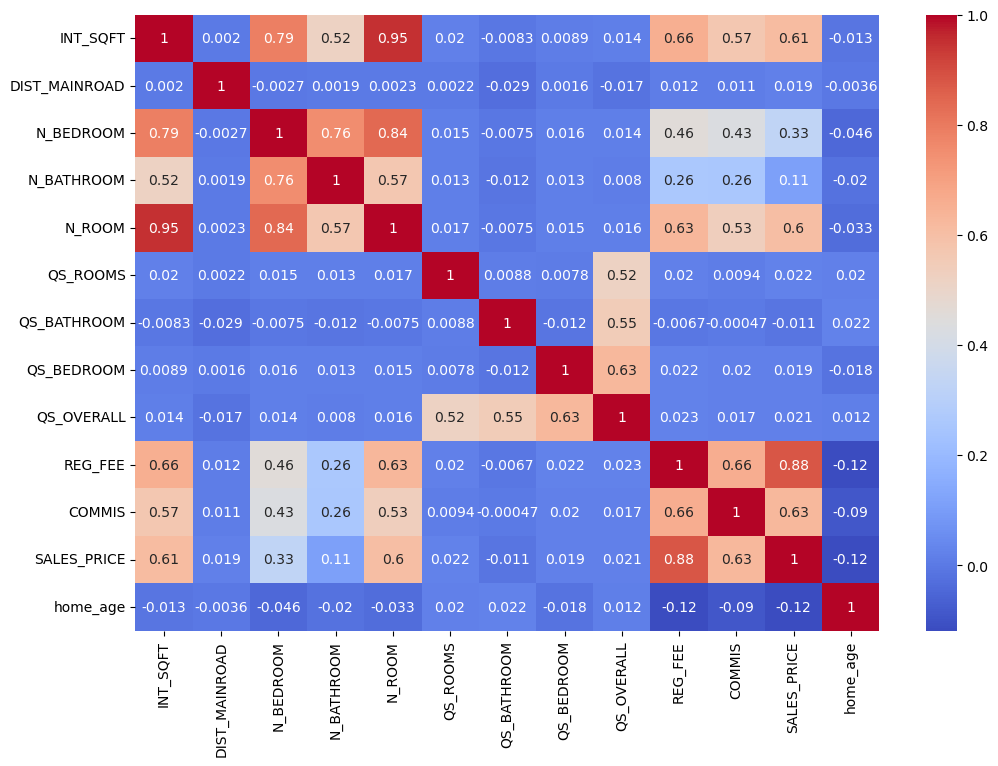

In [125]:
plt.figure(figsize=(12,8))
sns.heatmap(home_price.corr(numeric_only=True), annot=True, cmap="coolwarm")

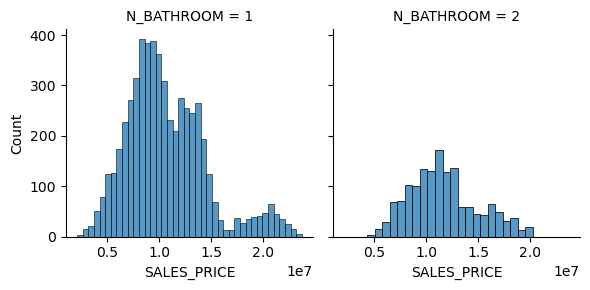

In [126]:
g = sns.FacetGrid(data=home_price, col='N_BATHROOM')
g.map(sns.histplot, 'SALES_PRICE')

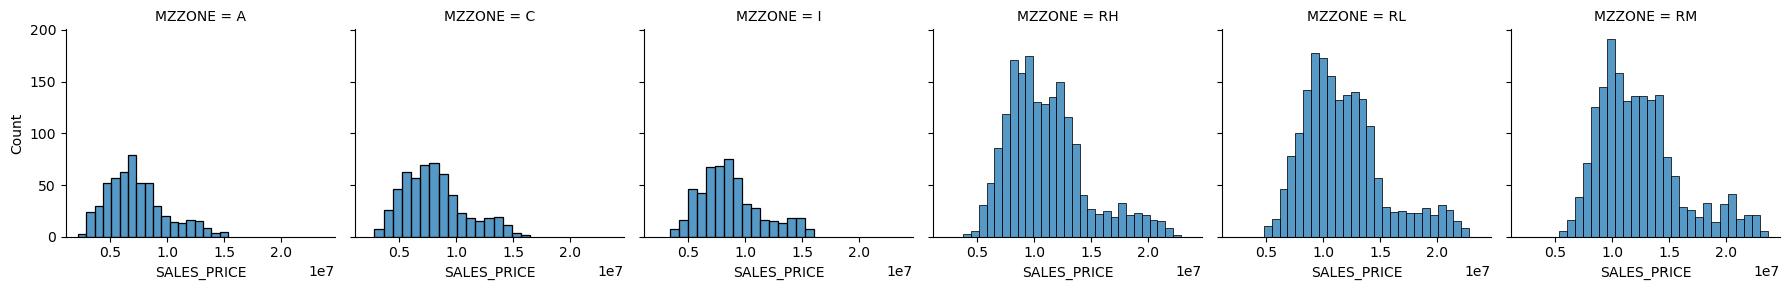

In [127]:
g = sns.FacetGrid(data=home_price, col='MZZONE')
g.map(sns.histplot, 'SALES_PRICE')

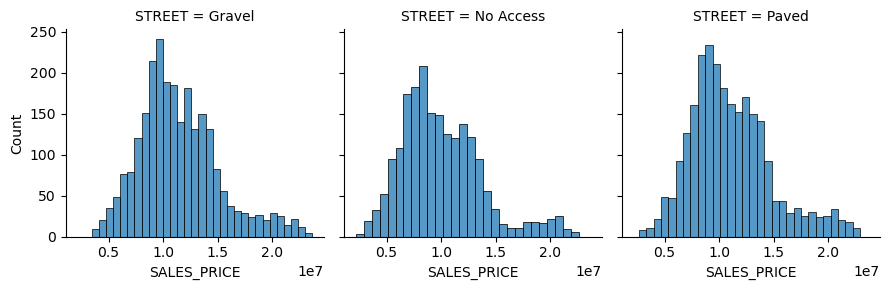

In [128]:
g = sns.FacetGrid(data=home_price, col='STREET')
g.map(sns.histplot, 'SALES_PRICE')

<Axes: xlabel='SALES_PRICE', ylabel='Density'>

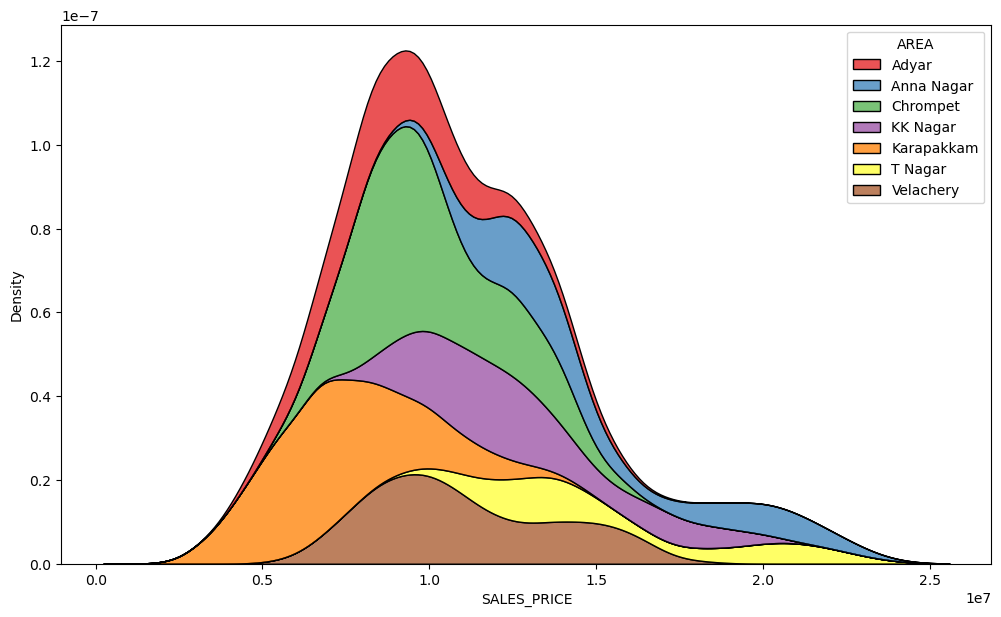

In [129]:
plt.figure(figsize=(12,7))
sns.kdeplot(data=home_price, hue='AREA', x='SALES_PRICE', palette='Set1', multiple="stack")

<Axes: xlabel='SALES_PRICE', ylabel='Density'>

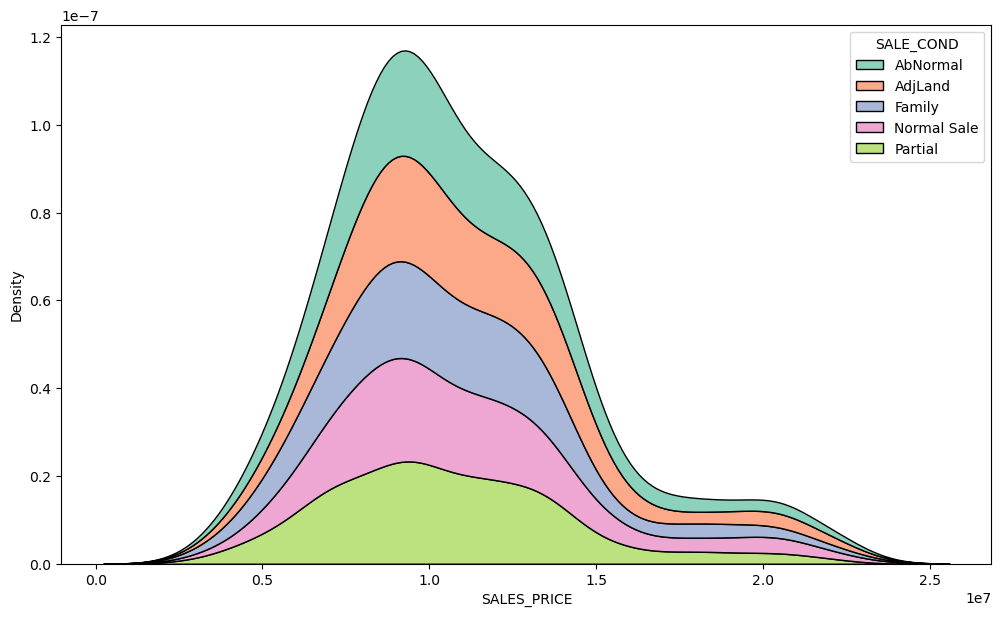

In [130]:
plt.figure(figsize=(12,7))
sns.kdeplot(data=home_price, hue='SALE_COND', x='SALES_PRICE', palette='Set2', multiple="stack")

<Axes: xlabel='SALES_PRICE', ylabel='Density'>

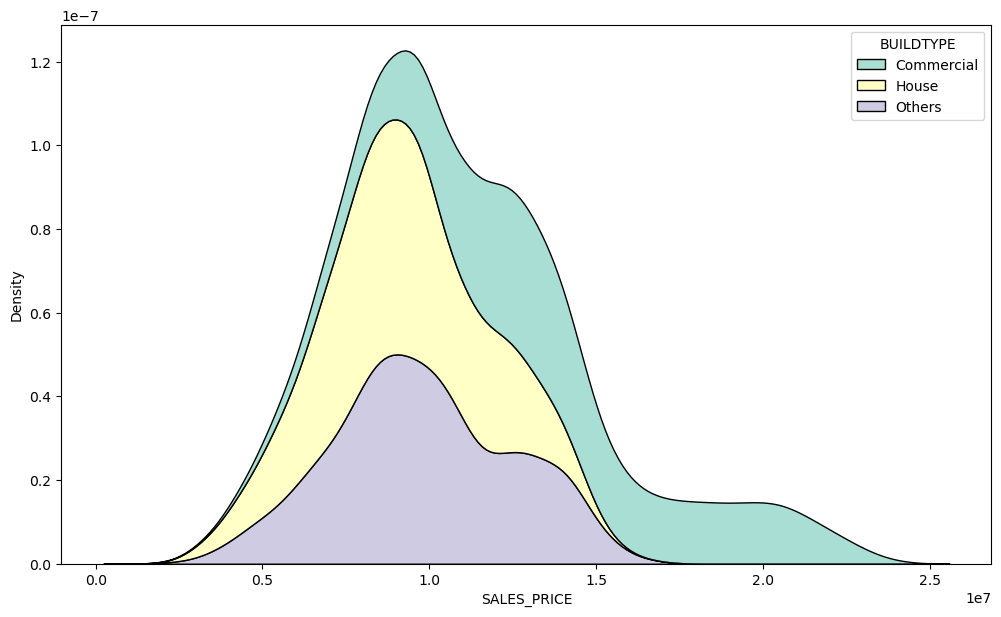

In [131]:
plt.figure(figsize=(12,7))
sns.kdeplot(data=home_price, hue='BUILDTYPE', x='SALES_PRICE', palette='Set3', multiple="stack")

<Figure size 1500x1000 with 0 Axes>

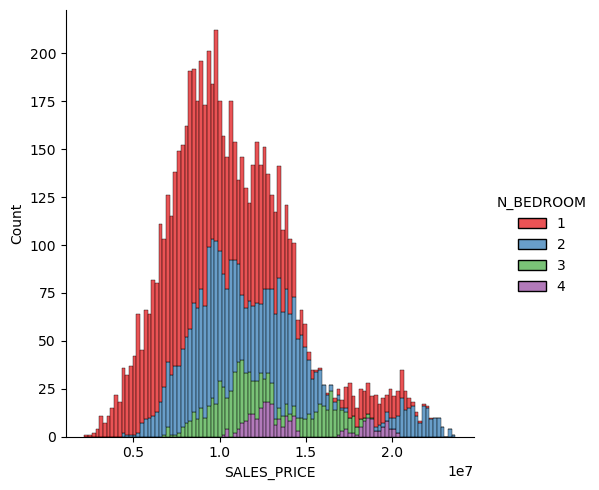

In [132]:
plt.figure(figsize=(15,10))
sns.displot(data=home_price, hue='N_BEDROOM', x='SALES_PRICE', palette='Set1', multiple="stack", bins=100)

<Figure size 1500x1000 with 0 Axes>

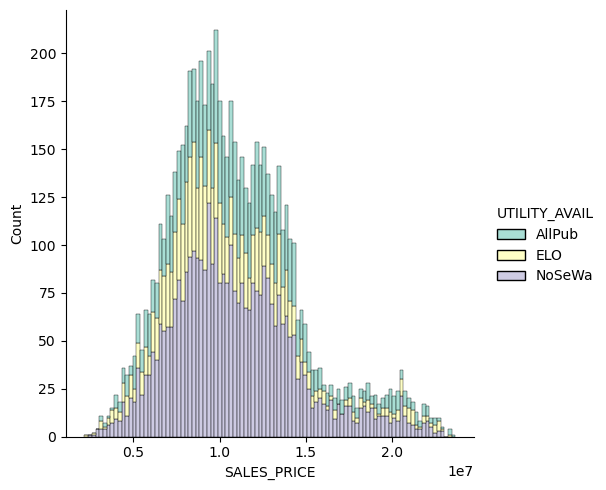

In [133]:
plt.figure(figsize=(15,10))
sns.displot(data=home_price, hue='UTILITY_AVAIL', x='SALES_PRICE', palette='Set3', multiple="stack", bins=100)

<Axes: xlabel='N_ROOM', ylabel='count'>

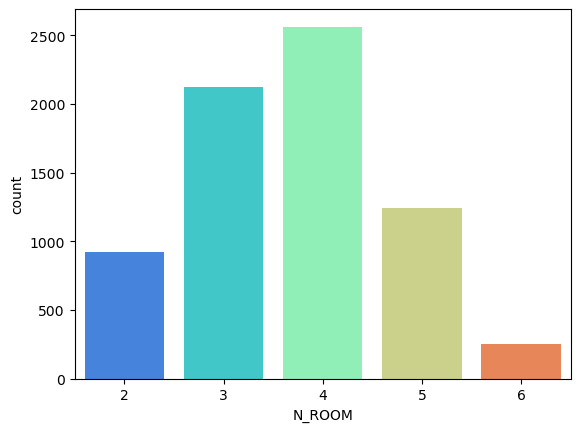

In [134]:
sns.countplot(x='N_ROOM',data=home_price,palette='rainbow')

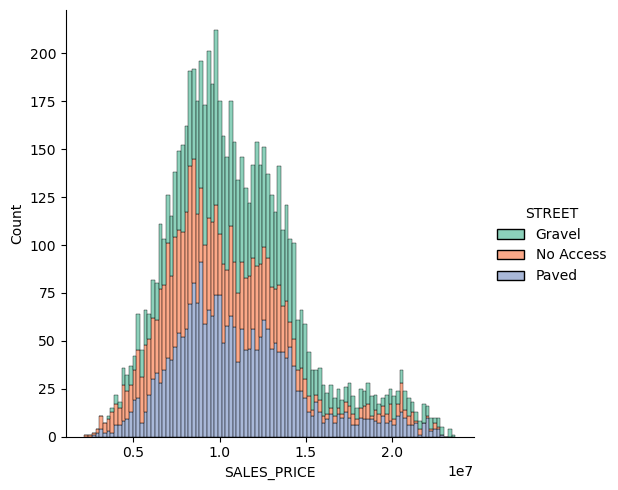

In [135]:
sns.displot(data=home_price, hue='STREET', x='SALES_PRICE', palette='Set2', multiple="stack", bins=100)

<Axes: xlabel='N_ROOM', ylabel='SALES_PRICE'>

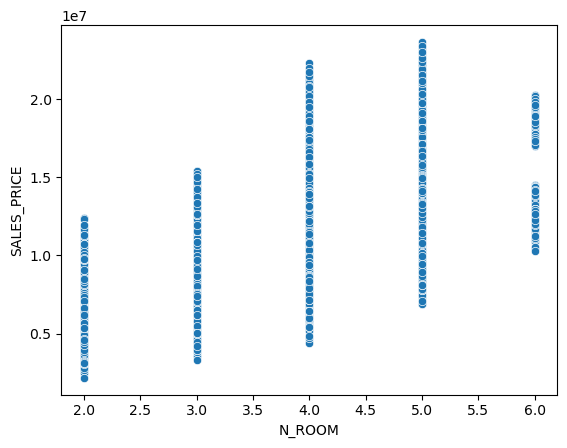

In [136]:
sns.scatterplot(data=home_price, x='N_ROOM', y='SALES_PRICE', palette='rainbow')

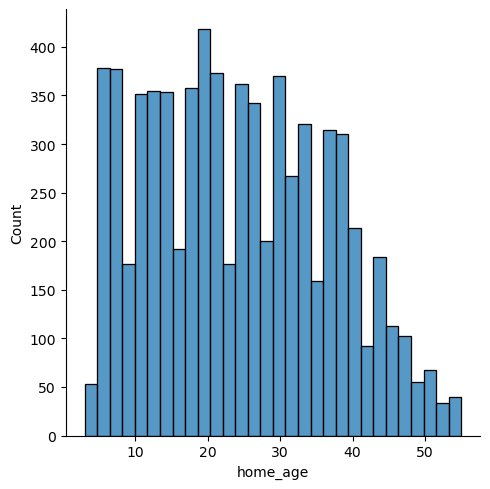

In [137]:
sns.displot(data=home_price, x='home_age', bins=30)

<Axes: xlabel='SALES_PRICE', ylabel='home_age'>

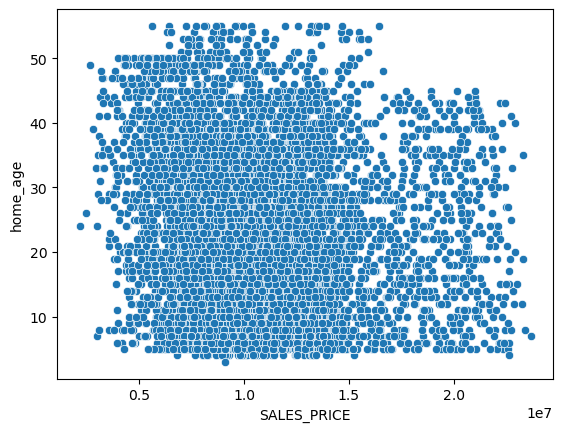

In [138]:
sns.scatterplot(data=home_price, x='SALES_PRICE', y='home_age', palette='rainbow')

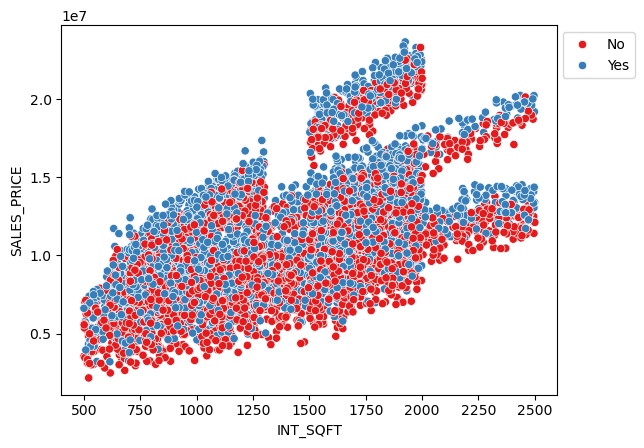

In [139]:
sns.scatterplot(data=home_price, x='INT_SQFT', y='SALES_PRICE', hue='PARK_FACIL',palette='Set1')
plt.legend(bbox_to_anchor=(1.17,1))

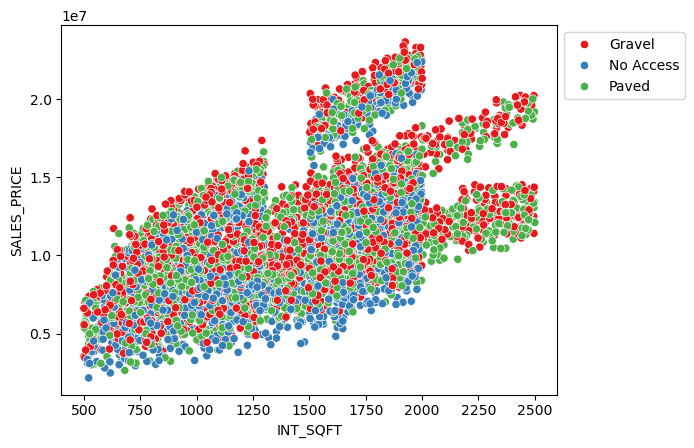

In [140]:
sns.scatterplot(data=home_price, x='INT_SQFT', y='SALES_PRICE', hue='STREET',palette='Set1')
plt.legend(bbox_to_anchor=(1,1))

## Preparing data for split

In [141]:
street = pd.get_dummies(home_price['STREET'],drop_first=True)
home_price = pd.concat([home_price,street], axis=1)
home_price.drop('STREET', axis=1, inplace=True)

In [142]:
bld = pd.get_dummies(home_price['BUILDTYPE'],drop_first=True)
home_price = pd.concat([home_price,bld], axis=1)
home_price.drop('BUILDTYPE', axis=1, inplace=True)

In [143]:
mz = pd.get_dummies(home_price['MZZONE'],drop_first=True)
home_price = pd.concat([home_price,mz], axis=1)
home_price.drop('MZZONE', axis=1, inplace=True)

In [144]:
sc = pd.get_dummies(home_price['SALE_COND'],drop_first=True)
home_price = pd.concat([home_price,sc], axis=1)
home_price.drop('SALE_COND', axis=1, inplace=True)

In [145]:
ar = pd.get_dummies(home_price['AREA'],drop_first=True)
home_price = pd.concat([home_price,ar], axis=1)
home_price.drop('AREA', axis=1, inplace=True)

In [146]:
ua = pd.get_dummies(home_price['UTILITY_AVAIL'],drop_first=True)
home_price = pd.concat([home_price,ua], axis=1)
home_price.drop('UTILITY_AVAIL', axis=1, inplace=True)

In [147]:
ac = pd.get_dummies(home_price['AREA_CATEGORY'],drop_first=True)
home_price = pd.concat([home_price,ac], axis=1)
home_price.drop('AREA_CATEGORY', axis=1, inplace=True)

In [148]:
home_price.columns

Index(['PRT_ID', 'INT_SQFT', 'DATE_SALE', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'PARK_FACIL', 'DATE_BUILD', 'QS_ROOMS',
       'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'REG_FEE', 'COMMIS',
       'SALES_PRICE', 'home_age', 'No Access', 'Paved', 'House', 'Others', 'C',
       'I', 'RH', 'RL', 'RM', 'AdjLand', 'Family', 'Normal Sale', 'Partial',
       'Anna Nagar', 'Chrompet', 'KK Nagar', 'Karapakkam', 'T Nagar',
       'Velachery', 'ELO', 'NoSeWa', 'Medium', 'Small'],
      dtype='object')

In [149]:
home_price.head(1)

PRT_ID  INT_SQFT DATE_SALE  DIST_MAINROAD  N_BEDROOM  N_BATHROOM  N_ROOM  \
0  P03210      1004  4/5/2011            131          1           1       3   

  PARK_FACIL  DATE_BUILD  QS_ROOMS  QS_BATHROOM  QS_BEDROOM  QS_OVERALL  \
0        Yes  15-05-1967       4.0          3.9         4.9        4.33   

   REG_FEE  COMMIS  SALES_PRICE  home_age  No Access  Paved  House  Others  \
0   380000  144400    7600000.0        44      False   True  False   False   

       C      I     RH     RL     RM  AdjLand  Family  Normal Sale  Partial  \
0  False  False  False  False  False    False   False        False    False   

   Anna Nagar  Chrompet  KK Nagar  Karapakkam  T Nagar  Velachery    ELO  \
0       False     False     False        True    False      False  False   

   NoSeWa  Medium  Small  
0   False    True  False

In [150]:
home_price['PARK_FACIL'] = [1 if x == 'Yes' else 0 for x in home_price['PARK_FACIL']]

In [151]:
home_price['PARK_FACIL'].value_counts()

PARK_FACIL
1    3587
0    3522
Name: count, dtype: int64

In [152]:
X = home_price.drop(['PRT_ID', 'DATE_SALE', 'DATE_BUILD', 'SALES_PRICE'], axis=1)
y = home_price['SALES_PRICE']

In [153]:
X.head(1)

INT_SQFT  DIST_MAINROAD  N_BEDROOM  N_BATHROOM  N_ROOM  PARK_FACIL  \
0      1004            131          1           1       3           1   

   QS_ROOMS  QS_BATHROOM  QS_BEDROOM  QS_OVERALL  REG_FEE  COMMIS  home_age  \
0       4.0          3.9         4.9        4.33   380000  144400        44   

   No Access  Paved  House  Others      C      I     RH     RL     RM  \
0      False   True  False   False  False  False  False  False  False   

   AdjLand  Family  Normal Sale  Partial  Anna Nagar  Chrompet  KK Nagar  \
0    False   False        False    False       False     False     False   

   Karapakkam  T Nagar  Velachery    ELO  NoSeWa  Medium  Small  
0        True    False      False  False   False    True  False

In [154]:
X.shape

(7109, 36)

In [155]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 36 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   INT_SQFT       7109 non-null   int64  
 1   DIST_MAINROAD  7109 non-null   int64  
 2   N_BEDROOM      7109 non-null   int32  
 3   N_BATHROOM     7109 non-null   int32  
 4   N_ROOM         7109 non-null   int64  
 5   PARK_FACIL     7109 non-null   int64  
 6   QS_ROOMS       7109 non-null   float64
 7   QS_BATHROOM    7109 non-null   float64
 8   QS_BEDROOM     7109 non-null   float64
 9   QS_OVERALL     7109 non-null   float64
 10  REG_FEE        7109 non-null   int64  
 11  COMMIS         7109 non-null   int64  
 12  home_age       7109 non-null   int64  
 13  No Access      7109 non-null   bool   
 14  Paved          7109 non-null   bool   
 15  House          7109 non-null   bool   
 16  Others         7109 non-null   bool   
 17  C              7109 non-null   bool   
 18  I       

## train_test_split

In [156]:
X_train, X_, y_train, y_ = train_test_split(X, y, test_size=0.4, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_, y_, test_size=0.5, random_state=42)
print(X_train.shape, X_test.shape, X_val.shape)
print(y_train.shape, y_test.shape, y_val.shape)
del X_, y_

(4265, 36) (1422, 36) (1422, 36)
(4265,) (1422,) (1422,)


## train model

In [157]:
def train_test_model(models, X_train, y_train, X_val, y_val):
    scores = []

    for model in models:
        for i in range(8):
            model_name = model.__class__.__name__
            if i == 0:
                model_name = model_name + ' (Raw)'
                mX_train = X_train
                mX_val = X_val
                scaler = None
                poly_d_2 = None
            
            elif i == 1:
                model_name = model_name + ' (StandardScaler)'
                stand_scaler = StandardScaler()
                mX_train = stand_scaler.fit_transform(X_train)
                mX_val = stand_scaler.transform(X_val)
                scaler = stand_scaler
                poly_d_2 = None


            elif i == 2:
                model_name = model_name + ' (MinMaxScaler)'
                minmax_scaler = MinMaxScaler()
                mX_train = minmax_scaler.fit_transform(X_train)
                mX_val = minmax_scaler.transform(X_val)
                scaler = minmax_scaler
            
            elif i == 3:
                model_name = model_name + ' (PolynomialFeatures)'
                poly = PolynomialFeatures(degree=2)
                mX_train = poly.fit_transform(X_train)
                mX_val = poly.transform(X_val)
                scaler = None
                poly_d_2 = poly
            

            elif i == 4:
                model_name = model_name + ' (PolynomialFeatures + StandardScaler)'
                poly = PolynomialFeatures(degree=2)
                stand_scaler = StandardScaler()
                mX_train = poly.fit_transform(X_train)
                mX_val = poly.transform(X_val)
                mX_train = stand_scaler.fit_transform(mX_train)
                mX_val = stand_scaler.transform(mX_val)
                scaler = stand_scaler
                poly_d_2 = poly

            elif i == 5:
                model_name = model_name + ' (PolynomialFeatures + MinMaxScaler)'
                poly = PolynomialFeatures(degree=2)
                minmax_scaler = MinMaxScaler()
                mX_train = poly.fit_transform(X_train)
                mX_val = poly.transform(X_val)
                mX_train = minmax_scaler.fit_transform(mX_train)
                mX_val = minmax_scaler.transform(mX_val)
                scaler = minmax_scaler
                poly_d_2 = poly

            elif i == 6:
                model_name = model_name + ' (RobustScaler)'
                robust_scaler = RobustScaler()
                mX_train = robust_scaler.fit_transform(X_train)
                mX_val = robust_scaler.transform(X_val)
                scaler = robust_scaler
                poly_d_2 = None
            
            elif i == 7:
                model_name = model_name + ' (RobustScaler + PolynomialFeatures)'
                robust_scaler = RobustScaler()
                poly = PolynomialFeatures(degree=2)
                mX_train = poly.fit_transform(X_train)
                mX_val = poly.transform(X_val)
                mX_train = robust_scaler.fit_transform(mX_train)
                mX_val = robust_scaler.transform(mX_val)
                scaler = robust_scaler
                poly_d_2 = poly


            print(f"Training {model_name}...")
            model.fit(mX_train, y_train)
            y_pred = model.predict(mX_val)
            score = model.score(mX_val, y_val) * 100
            MAE = metrics.mean_absolute_error(y_val, y_pred)
            MSE = metrics.mean_squared_error(y_val, y_pred)
            RMSE = np.sqrt(metrics.mean_squared_error(y_val, y_pred))
            evaluate_model = {'Model': model,
                            'Model name':model_name,
                            'Scaler': scaler,
                            'Polynomial Features': poly_d_2,
                            'Score': score,
                            'MAE': MAE,
                            'MSE': MSE,
                            'RMSE': RMSE}
            scores.append(evaluate_model)

            print(f"Model: {model_name}, Score: {score:.2f}%, MAE: {MAE:.2f}, MSE: {MSE:.2f}, RMSE: {RMSE:.2f}")
            plt.figure(figsize=(2, 2))
            sns.regplot(x=y_val, y=y_pred, line_kws={'color':'red'}, scatter_kws={"s": 10})
            plt.title(f"Actual vs Predicted Prices ({model_name})")
            plt.xlabel('Actual Prices')
            plt.ylabel('Predicted Prices')
            plt.show()
    return scores

Training LinearRegression (Raw)...
Model: LinearRegression (Raw), Score: 96.43%, MAE: 500854.05, MSE: 462391657730.54, RMSE: 679993.87


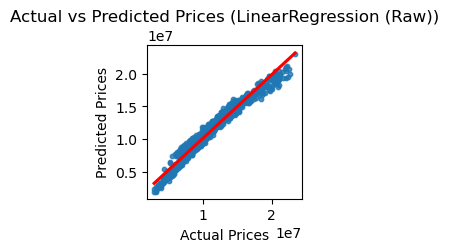

Training LinearRegression (StandardScaler)...
Model: LinearRegression (StandardScaler), Score: 96.43%, MAE: 500854.05, MSE: 462391657729.15, RMSE: 679993.87


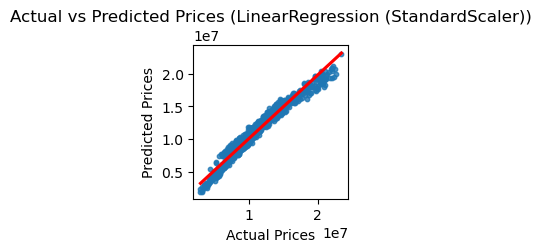

Training LinearRegression (MinMaxScaler)...
Model: LinearRegression (MinMaxScaler), Score: 96.43%, MAE: 500854.05, MSE: 462391657729.15, RMSE: 679993.87


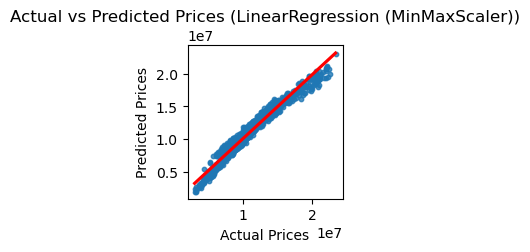

Training LinearRegression (PolynomialFeatures)...
Model: LinearRegression (PolynomialFeatures), Score: 99.96%, MAE: 55830.88, MSE: 5161564862.59, RMSE: 71844.03


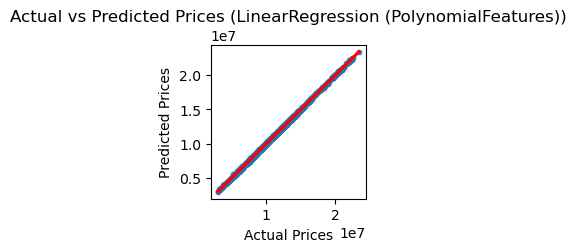

Training LinearRegression (PolynomialFeatures + StandardScaler)...
Model: LinearRegression (PolynomialFeatures + StandardScaler), Score: 99.96%, MAE: 55565.76, MSE: 5109623037.79, RMSE: 71481.63


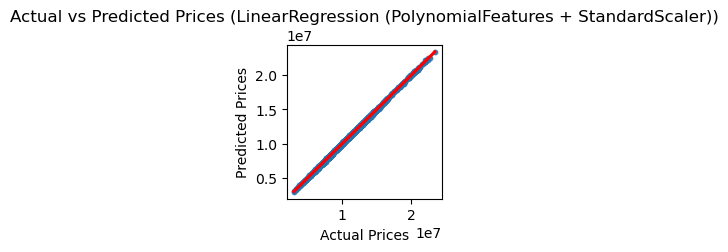

Training LinearRegression (PolynomialFeatures + MinMaxScaler)...
Model: LinearRegression (PolynomialFeatures + MinMaxScaler), Score: 99.96%, MAE: 55576.47, MSE: 5112652354.88, RMSE: 71502.81


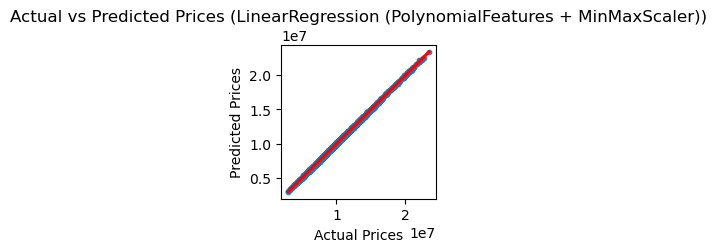

Training LinearRegression (RobustScaler)...
Model: LinearRegression (RobustScaler), Score: 96.43%, MAE: 500854.05, MSE: 462391657729.14, RMSE: 679993.87


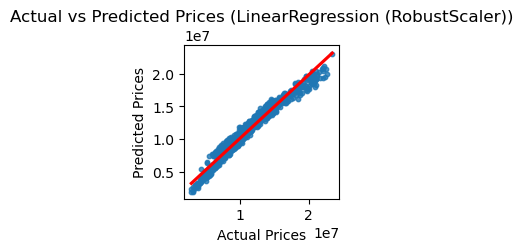

Training LinearRegression (RobustScaler + PolynomialFeatures)...
Model: LinearRegression (RobustScaler + PolynomialFeatures), Score: 99.96%, MAE: 55554.08, MSE: 5108476827.35, RMSE: 71473.61


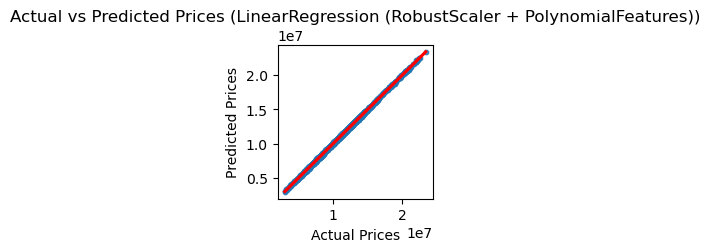

Training DecisionTreeRegressor (Raw)...
Model: DecisionTreeRegressor (Raw), Score: 90.40%, MAE: 855342.52, MSE: 1244316420447.06, RMSE: 1115489.32


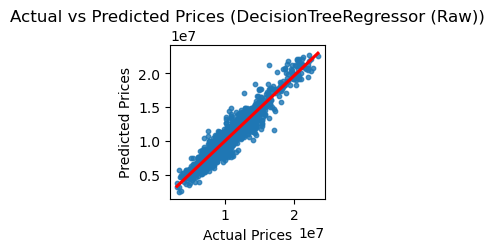

Training DecisionTreeRegressor (StandardScaler)...
Model: DecisionTreeRegressor (StandardScaler), Score: 90.89%, MAE: 837030.69, MSE: 1181942903797.56, RMSE: 1087171.98


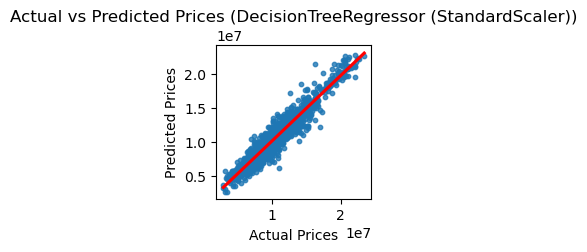

Training DecisionTreeRegressor (MinMaxScaler)...
Model: DecisionTreeRegressor (MinMaxScaler), Score: 90.50%, MAE: 844838.50, MSE: 1231918567086.57, RMSE: 1109918.27


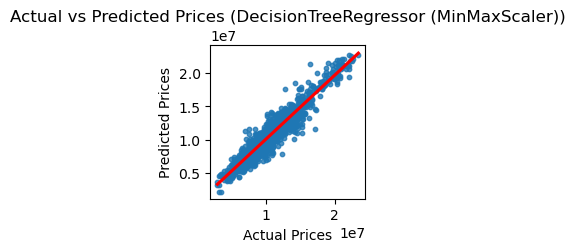

Training DecisionTreeRegressor (PolynomialFeatures)...
Model: DecisionTreeRegressor (PolynomialFeatures), Score: 88.04%, MAE: 899944.16, MSE: 1550356836648.42, RMSE: 1245133.26


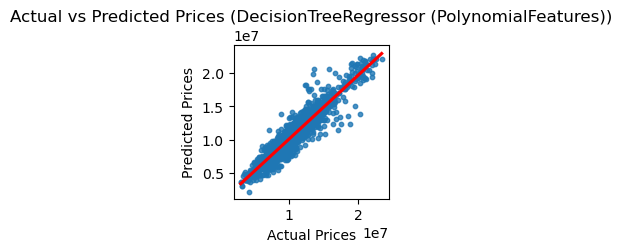

Training DecisionTreeRegressor (PolynomialFeatures + StandardScaler)...
Model: DecisionTreeRegressor (PolynomialFeatures + StandardScaler), Score: 88.25%, MAE: 875702.83, MSE: 1523733127836.78, RMSE: 1234395.86


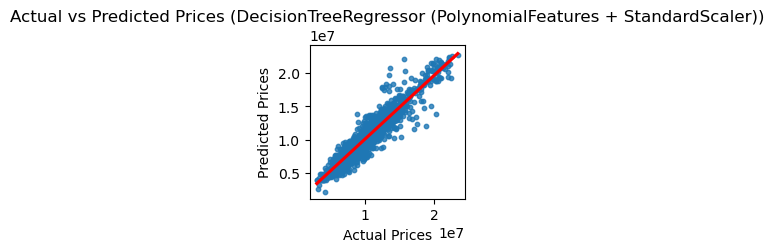

Training DecisionTreeRegressor (PolynomialFeatures + MinMaxScaler)...
Model: DecisionTreeRegressor (PolynomialFeatures + MinMaxScaler), Score: 88.18%, MAE: 893417.17, MSE: 1532411277229.96, RMSE: 1237906.01


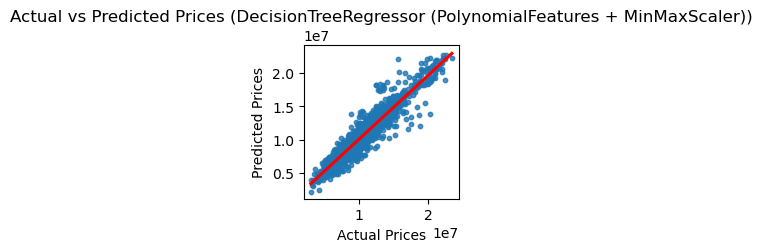

Training DecisionTreeRegressor (RobustScaler)...
Model: DecisionTreeRegressor (RobustScaler), Score: 90.52%, MAE: 842571.41, MSE: 1229204815131.61, RMSE: 1108695.10


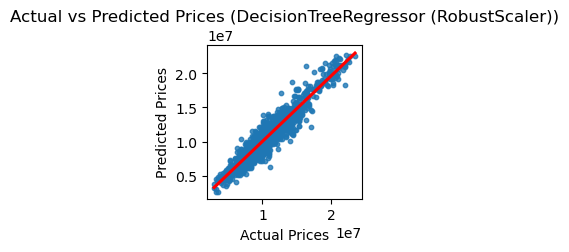

Training DecisionTreeRegressor (RobustScaler + PolynomialFeatures)...
Model: DecisionTreeRegressor (RobustScaler + PolynomialFeatures), Score: 88.35%, MAE: 890494.83, MSE: 1510559907346.75, RMSE: 1229048.37


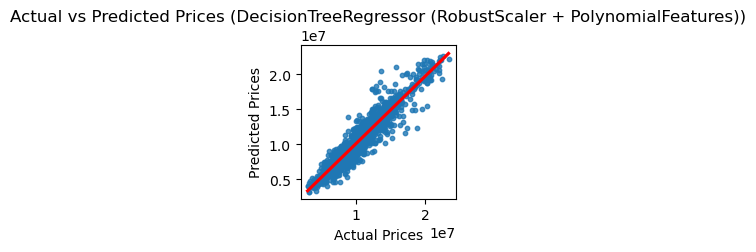

Training RandomForestRegressor (Raw)...
Model: RandomForestRegressor (Raw), Score: 95.02%, MAE: 626771.18, MSE: 646420436795.41, RMSE: 804002.76


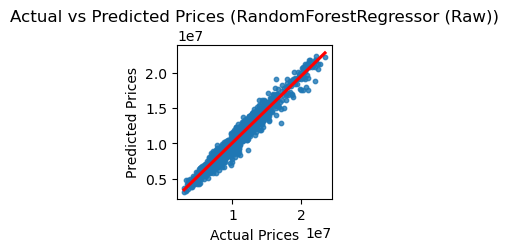

Training RandomForestRegressor (StandardScaler)...
Model: RandomForestRegressor (StandardScaler), Score: 95.15%, MAE: 620692.22, MSE: 628428372831.18, RMSE: 792734.74


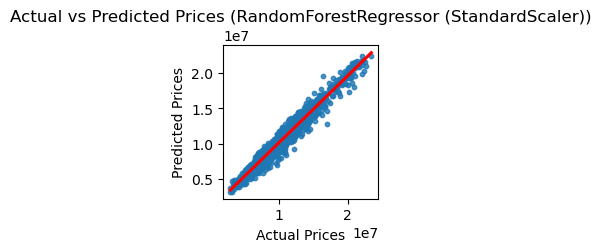

Training RandomForestRegressor (MinMaxScaler)...
Model: RandomForestRegressor (MinMaxScaler), Score: 95.20%, MAE: 622268.66, MSE: 622763917096.73, RMSE: 789153.92


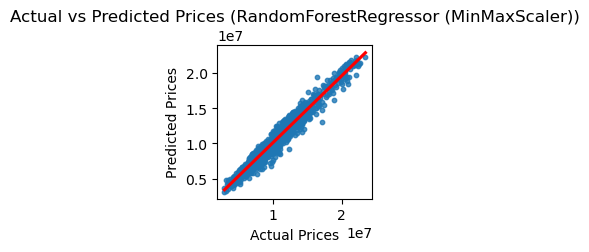

Training RandomForestRegressor (PolynomialFeatures)...
Model: RandomForestRegressor (PolynomialFeatures), Score: 93.93%, MAE: 673003.68, MSE: 786697218890.07, RMSE: 886959.54


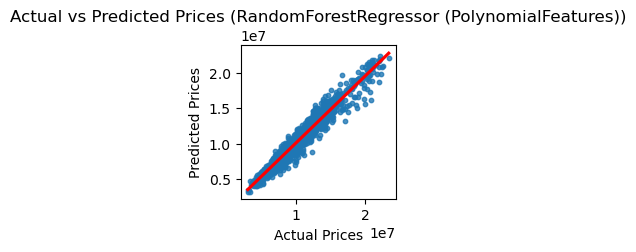

Training RandomForestRegressor (PolynomialFeatures + StandardScaler)...
Model: RandomForestRegressor (PolynomialFeatures + StandardScaler), Score: 93.76%, MAE: 678475.71, MSE: 809825302055.01, RMSE: 899902.94


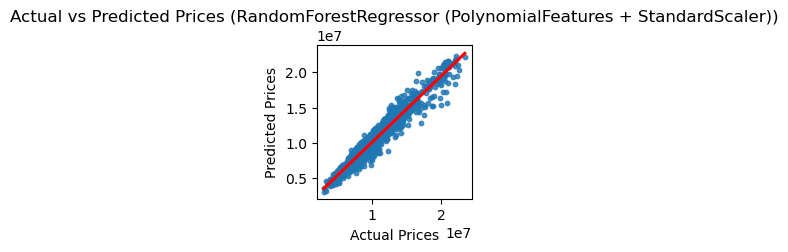

Training RandomForestRegressor (PolynomialFeatures + MinMaxScaler)...
Model: RandomForestRegressor (PolynomialFeatures + MinMaxScaler), Score: 93.97%, MAE: 674193.22, MSE: 781878199861.82, RMSE: 884238.77


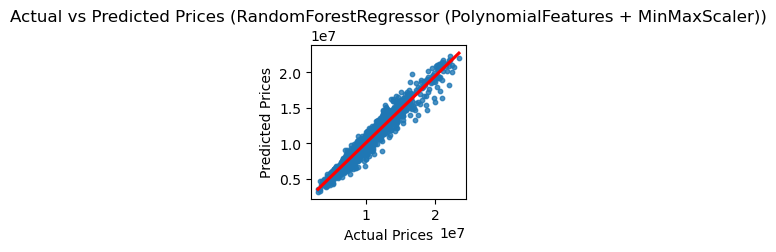

Training RandomForestRegressor (RobustScaler)...
Model: RandomForestRegressor (RobustScaler), Score: 95.15%, MAE: 621080.70, MSE: 628891612365.61, RMSE: 793026.87


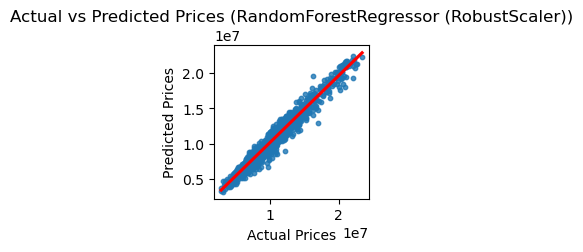

Training RandomForestRegressor (RobustScaler + PolynomialFeatures)...
Model: RandomForestRegressor (RobustScaler + PolynomialFeatures), Score: 93.81%, MAE: 676506.39, MSE: 802747717868.04, RMSE: 895961.90


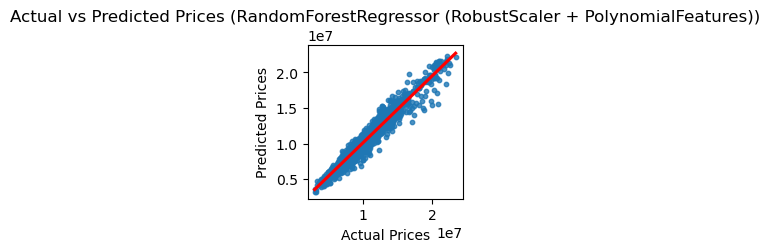

Training SVR (Raw)...
Model: SVR (Raw), Score: -1.60%, MAE: 2778076.59, MSE: 13175870976920.97, RMSE: 3629858.26


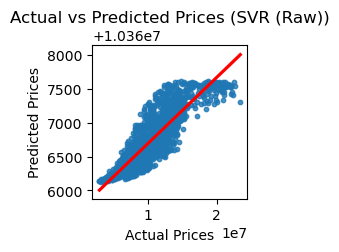

Training SVR (StandardScaler)...
Model: SVR (StandardScaler), Score: -1.62%, MAE: 2778307.70, MSE: 13177984367614.85, RMSE: 3630149.36


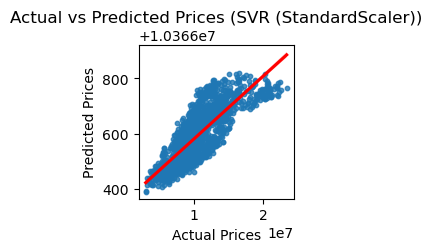

Training SVR (MinMaxScaler)...
Model: SVR (MinMaxScaler), Score: -1.62%, MAE: 2778325.19, MSE: 13178123953135.15, RMSE: 3630168.58


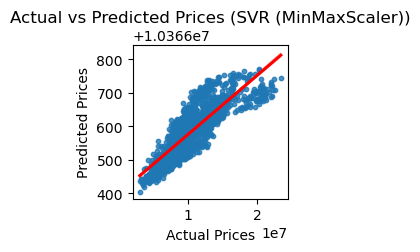

Training SVR (PolynomialFeatures)...
Model: SVR (PolynomialFeatures), Score: -1.60%, MAE: 2778002.80, MSE: 13175317215009.53, RMSE: 3629781.98


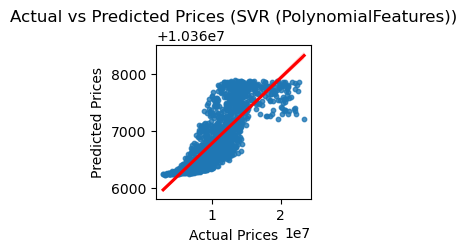

Training SVR (PolynomialFeatures + StandardScaler)...
Model: SVR (PolynomialFeatures + StandardScaler), Score: -1.62%, MAE: 2778332.09, MSE: 13178177910355.62, RMSE: 3630176.02


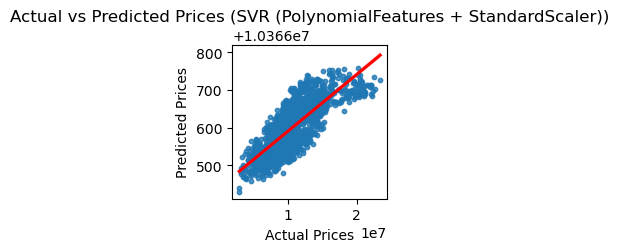

Training SVR (PolynomialFeatures + MinMaxScaler)...
Model: SVR (PolynomialFeatures + MinMaxScaler), Score: -1.62%, MAE: 2778333.18, MSE: 13178190530686.96, RMSE: 3630177.75


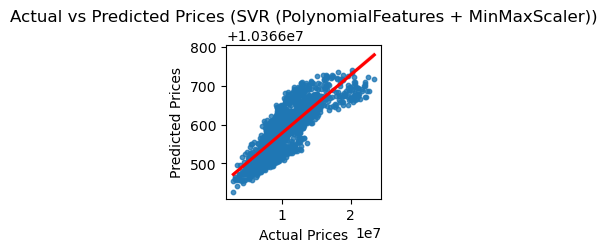

Training SVR (RobustScaler)...
Model: SVR (RobustScaler), Score: -1.62%, MAE: 2778255.68, MSE: 13177582842827.44, RMSE: 3630094.05


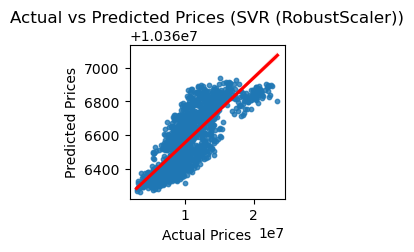

Training SVR (RobustScaler + PolynomialFeatures)...
Model: SVR (RobustScaler + PolynomialFeatures), Score: -1.61%, MAE: 2778232.41, MSE: 13177278681182.37, RMSE: 3630052.16


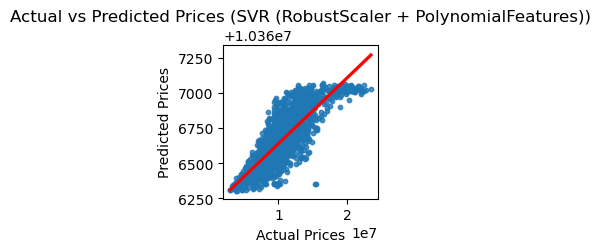

Training KNeighborsRegressor (Raw)...
Model: KNeighborsRegressor (Raw), Score: 74.64%, MAE: 1395621.25, MSE: 3288786534400.00, RMSE: 1813501.12


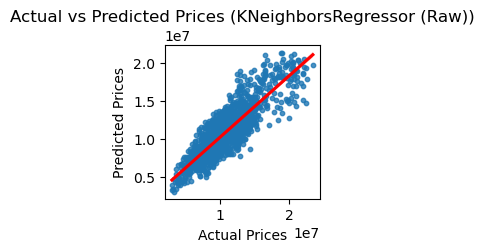

Training KNeighborsRegressor (StandardScaler)...
Model: KNeighborsRegressor (StandardScaler), Score: 84.34%, MAE: 1091278.12, MSE: 2031312699392.00, RMSE: 1425241.25


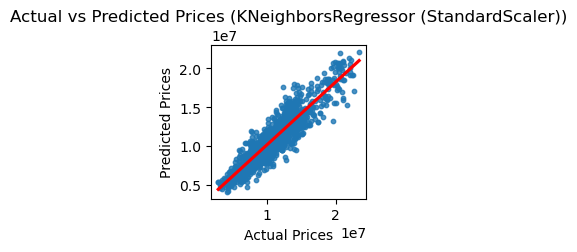

Training KNeighborsRegressor (MinMaxScaler)...
Model: KNeighborsRegressor (MinMaxScaler), Score: 84.79%, MAE: 1076742.62, MSE: 1972169211904.00, RMSE: 1404339.38


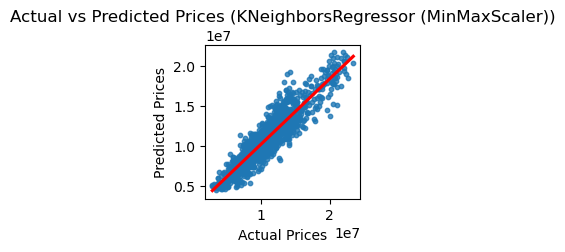

Training KNeighborsRegressor (PolynomialFeatures)...
Model: KNeighborsRegressor (PolynomialFeatures), Score: 74.10%, MAE: 1404793.75, MSE: 3359064719360.00, RMSE: 1832775.12


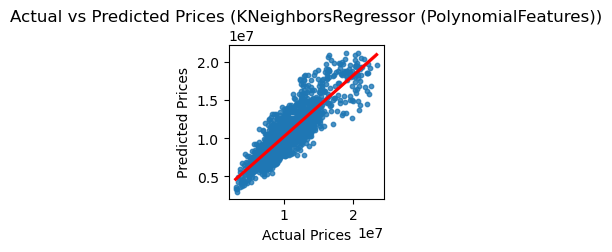

Training KNeighborsRegressor (PolynomialFeatures + StandardScaler)...
Model: KNeighborsRegressor (PolynomialFeatures + StandardScaler), Score: 82.45%, MAE: 1147461.25, MSE: 2275593682944.00, RMSE: 1508507.12


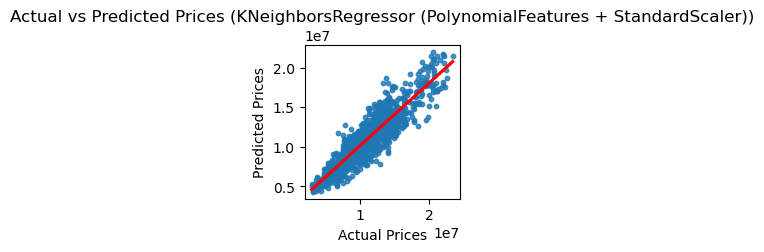

Training KNeighborsRegressor (PolynomialFeatures + MinMaxScaler)...
Model: KNeighborsRegressor (PolynomialFeatures + MinMaxScaler), Score: 84.07%, MAE: 1094420.75, MSE: 2066232639488.00, RMSE: 1437439.62


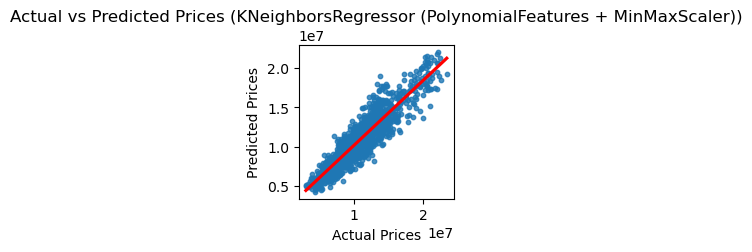

Training KNeighborsRegressor (RobustScaler)...
Model: KNeighborsRegressor (RobustScaler), Score: 88.42%, MAE: 921539.75, MSE: 1501129211904.00, RMSE: 1225205.75


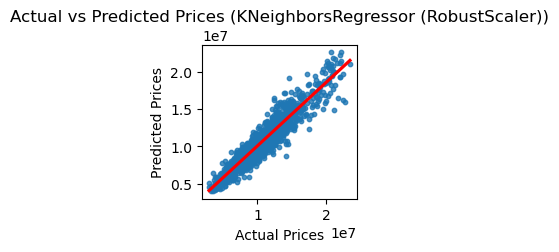

Training KNeighborsRegressor (RobustScaler + PolynomialFeatures)...
Model: KNeighborsRegressor (RobustScaler + PolynomialFeatures), Score: 85.81%, MAE: 1019484.44, MSE: 1840391389184.00, RMSE: 1356610.25


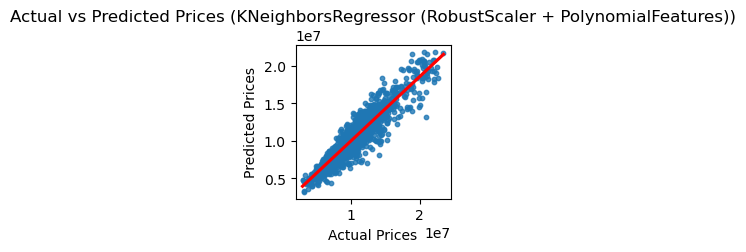

Training GradientBoostingRegressor (Raw)...
Model: GradientBoostingRegressor (Raw), Score: 95.03%, MAE: 637645.11, MSE: 645128701816.10, RMSE: 803199.04


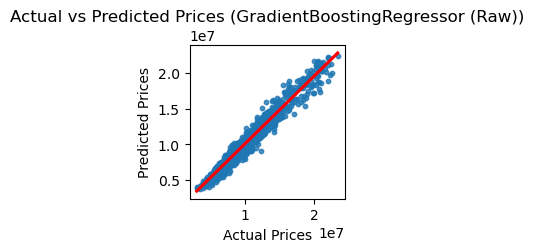

Training GradientBoostingRegressor (StandardScaler)...
Model: GradientBoostingRegressor (StandardScaler), Score: 95.03%, MAE: 637690.04, MSE: 645149948833.78, RMSE: 803212.27


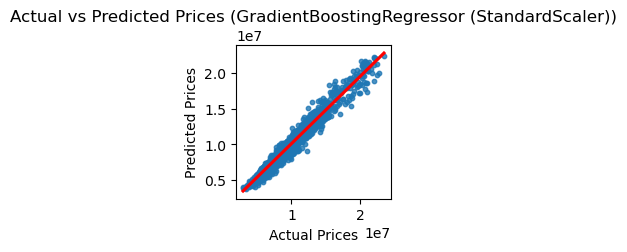

Training GradientBoostingRegressor (MinMaxScaler)...
Model: GradientBoostingRegressor (MinMaxScaler), Score: 95.03%, MAE: 637491.79, MSE: 644998283948.64, RMSE: 803117.85


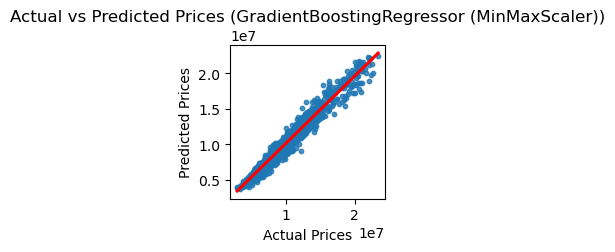

Training GradientBoostingRegressor (PolynomialFeatures)...
Model: GradientBoostingRegressor (PolynomialFeatures), Score: 95.16%, MAE: 625072.96, MSE: 627172356884.01, RMSE: 791942.14


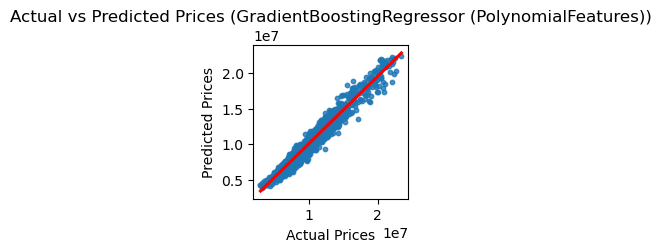

Training GradientBoostingRegressor (PolynomialFeatures + StandardScaler)...
Model: GradientBoostingRegressor (PolynomialFeatures + StandardScaler), Score: 95.15%, MAE: 625771.63, MSE: 628428333487.34, RMSE: 792734.72


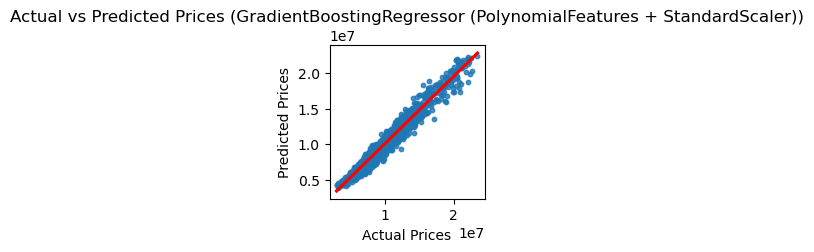

Training GradientBoostingRegressor (PolynomialFeatures + MinMaxScaler)...
Model: GradientBoostingRegressor (PolynomialFeatures + MinMaxScaler), Score: 95.16%, MAE: 625392.47, MSE: 628002739696.12, RMSE: 792466.24


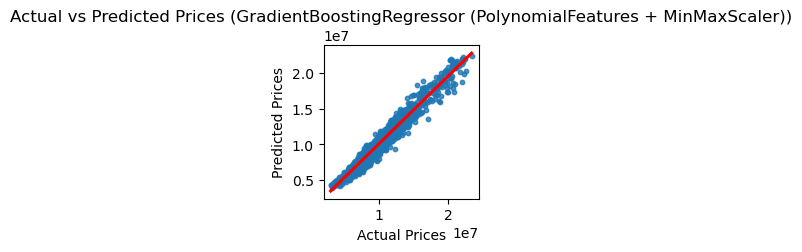

Training GradientBoostingRegressor (RobustScaler)...
Model: GradientBoostingRegressor (RobustScaler), Score: 95.03%, MAE: 637645.11, MSE: 645128701816.10, RMSE: 803199.04


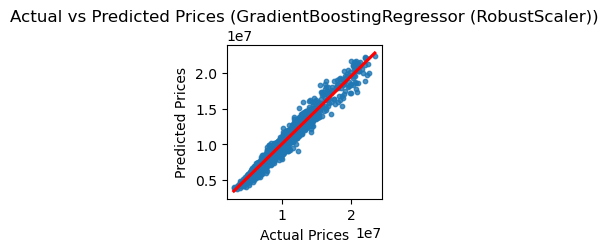

Training GradientBoostingRegressor (RobustScaler + PolynomialFeatures)...
Model: GradientBoostingRegressor (RobustScaler + PolynomialFeatures), Score: 95.16%, MAE: 625478.26, MSE: 627633534922.80, RMSE: 792233.26


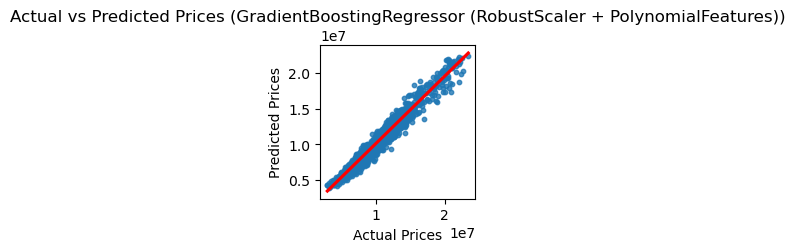

Training AdaBoostRegressor (Raw)...
Model: AdaBoostRegressor (Raw), Score: 86.84%, MAE: 1072453.10, MSE: 1706203314999.81, RMSE: 1306217.18


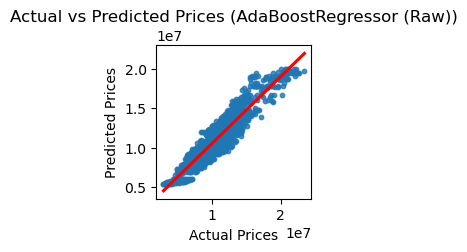

Training AdaBoostRegressor (StandardScaler)...
Model: AdaBoostRegressor (StandardScaler), Score: 86.83%, MAE: 1066969.05, MSE: 1707761659397.75, RMSE: 1306813.55


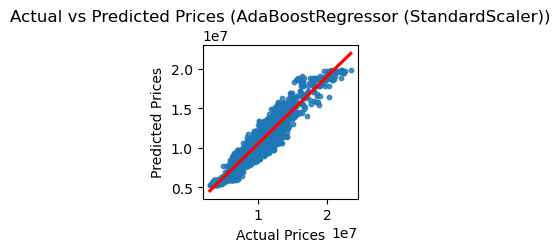

Training AdaBoostRegressor (MinMaxScaler)...
Model: AdaBoostRegressor (MinMaxScaler), Score: 86.80%, MAE: 1076927.25, MSE: 1712262284837.48, RMSE: 1308534.40


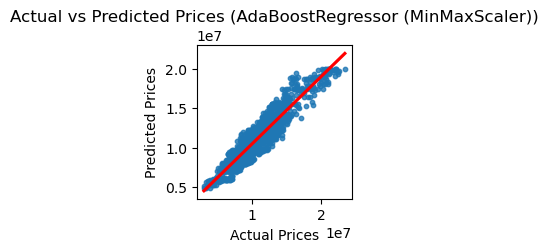

Training AdaBoostRegressor (PolynomialFeatures)...
Model: AdaBoostRegressor (PolynomialFeatures), Score: 87.42%, MAE: 1049541.51, MSE: 1631666645794.25, RMSE: 1277367.08


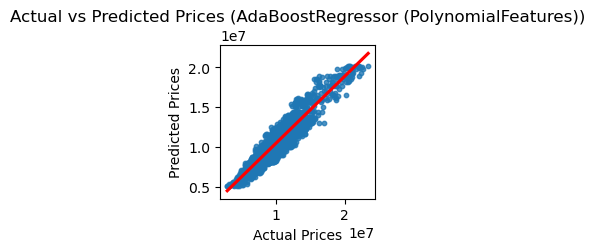

Training AdaBoostRegressor (PolynomialFeatures + StandardScaler)...
Model: AdaBoostRegressor (PolynomialFeatures + StandardScaler), Score: 87.24%, MAE: 1057316.46, MSE: 1654220185141.78, RMSE: 1286164.91


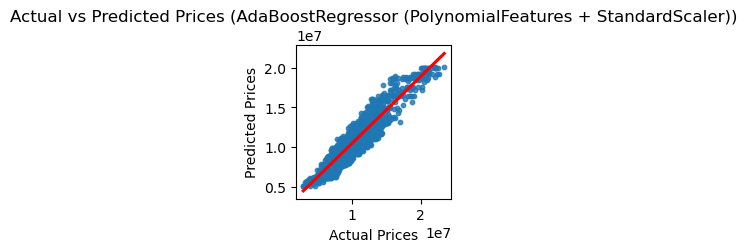

Training AdaBoostRegressor (PolynomialFeatures + MinMaxScaler)...
Model: AdaBoostRegressor (PolynomialFeatures + MinMaxScaler), Score: 86.97%, MAE: 1070551.18, MSE: 1689428277006.47, RMSE: 1299780.09


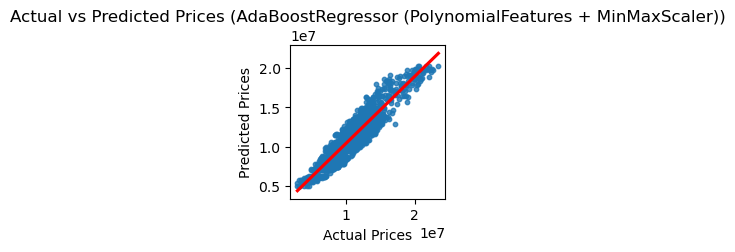

Training AdaBoostRegressor (RobustScaler)...
Model: AdaBoostRegressor (RobustScaler), Score: 86.55%, MAE: 1079177.26, MSE: 1744158537940.92, RMSE: 1320665.94


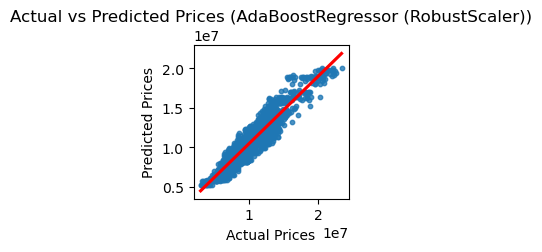

Training AdaBoostRegressor (RobustScaler + PolynomialFeatures)...
Model: AdaBoostRegressor (RobustScaler + PolynomialFeatures), Score: 87.71%, MAE: 1044227.85, MSE: 1593517392515.27, RMSE: 1262345.99


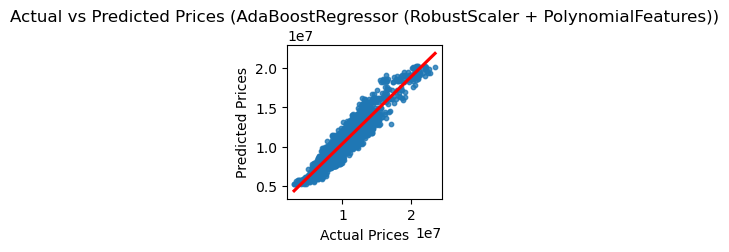

In [158]:
randomforset = RandomForestRegressor()
decisiontree = DecisionTreeRegressor()
svr = SVR()
knn = KNeighborsRegressor()
gradientboost = GradientBoostingRegressor()
adaboost = AdaBoostRegressor()
linear = LinearRegression()
models = [linear, decisiontree, randomforset, svr, knn, gradientboost, adaboost]
# train and test the models
scores = train_test_model(models, X_train, y_train, X_val, y_val)

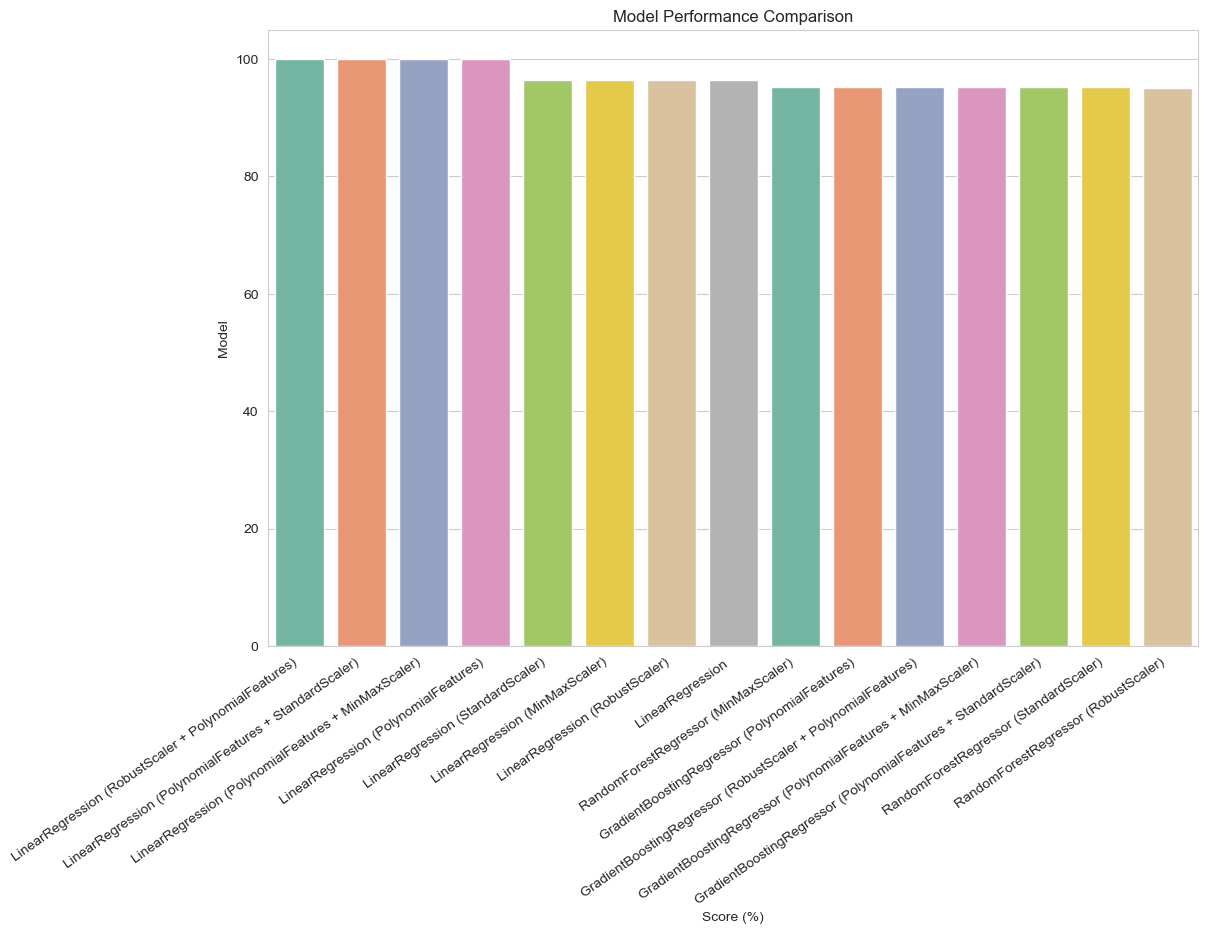

In [159]:
scores_df = pd.DataFrame(scores)
scores_df['Model name'] = scores_df['Model name'].str.replace('(Raw)', '')
scores_df = scores_df.sort_values(by='Score', ascending=False).reset_index(drop=True)
top_10_models = scores_df.head(15)
plt.figure(figsize=(12, 8))
sns.set_style('whitegrid')
sns.barplot(x='Model name', y='Score', data= top_10_models, palette='Set2')
plt.xticks(rotation=35, ha='right')
plt.title('Model Performance Comparison')
plt.xlabel('Score (%)')
plt.ylabel('Model')
plt.show()

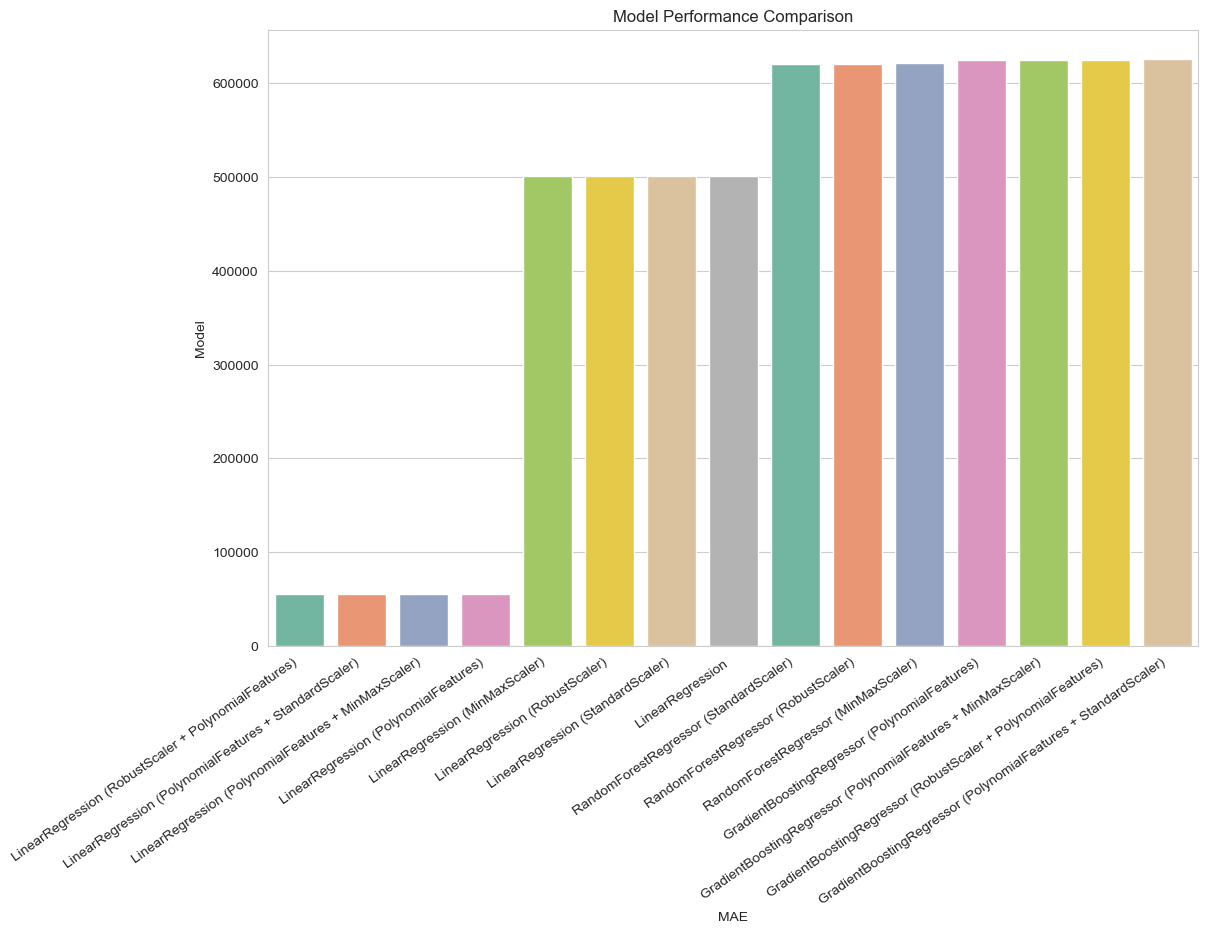

In [160]:
scores_df = scores_df.sort_values(by='MAE', ascending=True).reset_index(drop=True)
top_10_models = scores_df.head(15)
plt.figure(figsize=(12, 8))
sns.set_style('whitegrid')
sns.barplot(x='Model name', y='MAE', data= top_10_models, palette='Set2')
plt.xticks(rotation=35, ha='right')
plt.title('Model Performance Comparison')
plt.xlabel('MAE')
plt.ylabel('Model')
plt.show()

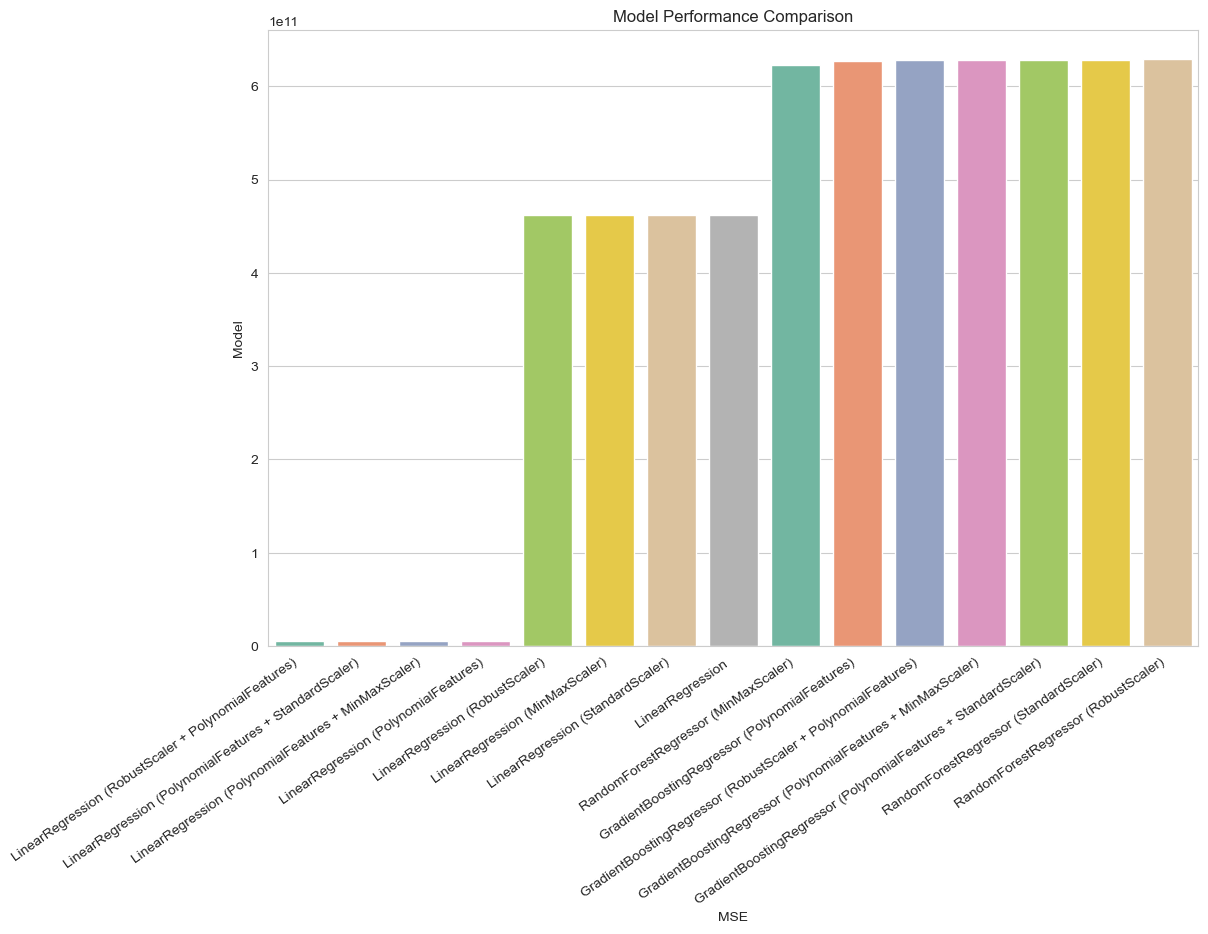

In [161]:
scores_df = scores_df.sort_values(by='MSE', ascending=True).reset_index(drop=True)
top_10_models = scores_df.head(15)
plt.figure(figsize=(12, 8))
sns.set_style('whitegrid')
sns.barplot(x='Model name', y='MSE', data= top_10_models, palette='Set2')
plt.xticks(rotation=35, ha='right')
plt.title('Model Performance Comparison')
plt.xlabel('MSE')
plt.ylabel('Model')
plt.show()

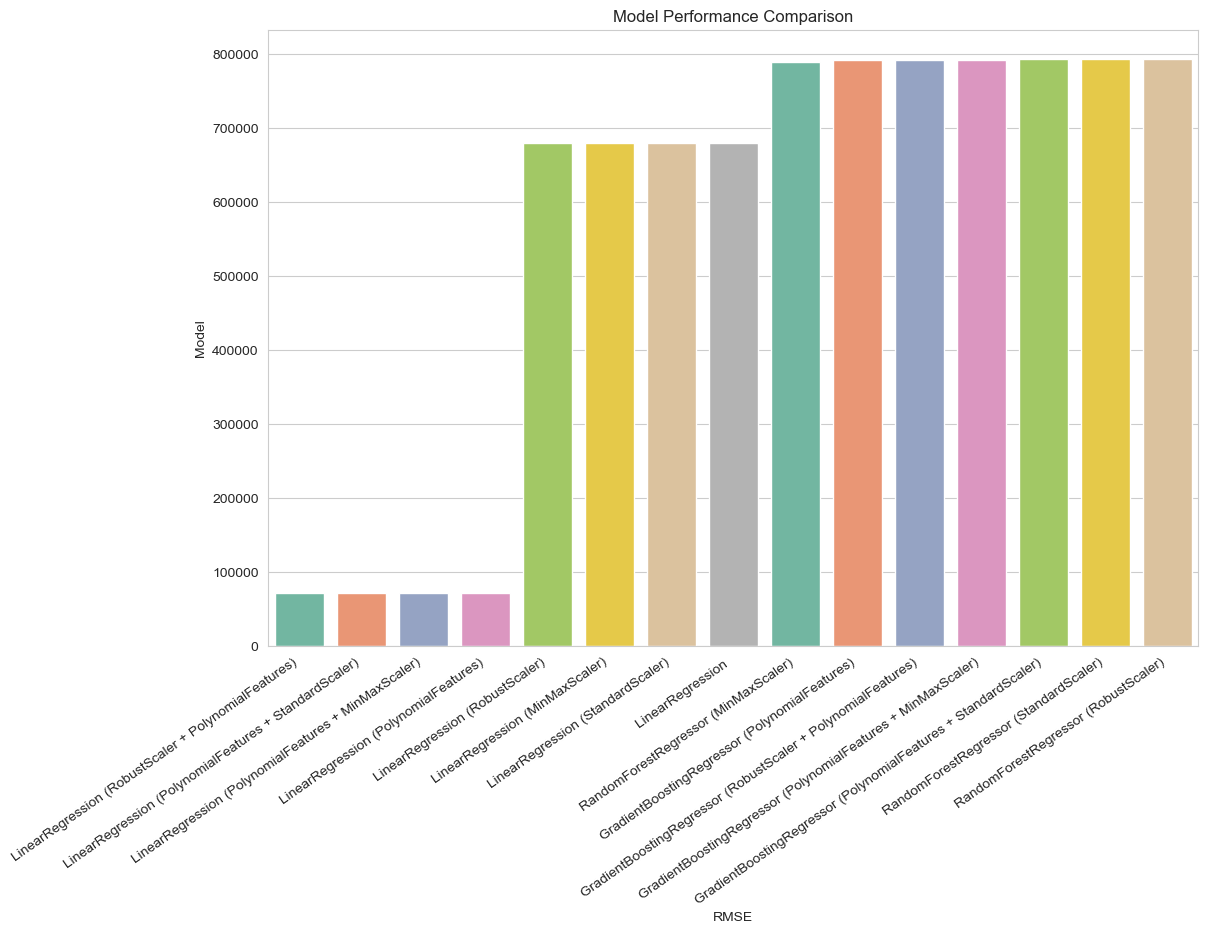

In [162]:
scores_df = scores_df.sort_values(by='RMSE', ascending=True).reset_index(drop=True)
top_10_models = scores_df.head(15)
plt.figure(figsize=(12, 8))
sns.set_style('whitegrid')
sns.barplot(x='Model name', y='RMSE', data= top_10_models, palette='Set2')
plt.xticks(rotation=35, ha='right')
plt.title('Model Performance Comparison')
plt.xlabel('RMSE')
plt.ylabel('Model')
plt.show()

In [163]:
# save the best model
scores_df = scores_df.sort_values(by='Score', ascending=False)
best_model_info = scores_df.iloc[0]
best_model = best_model_info['Model']
scaler = best_model_info['Scaler']
poly_d_2 = best_model_info['Polynomial Features']
X_test = poly_d_2.transform(X_test)
X_test = scaler.transform(X_test)
predict = best_model.predict(X_test)
score = best_model.score(X_test, y_test) * 100
MAE = metrics.mean_absolute_error(y_test, predict)
MSE = metrics.mean_squared_error(y_test, predict)
RMSE = np.sqrt(metrics.mean_squared_error(y_test, predict))

print(f"Best model: {best_model_info['Model name']}")
print(f"Score: {score:.2f}%")
print(f"MAE: {MAE:.2f}")
print(f"MSE: {MSE:.2f}")
print(f"RMSE: {RMSE:.2f}")
import joblib
joblib.dump(best_model, 'house_price_model.pkl')

Best model: LinearRegression (RobustScaler + PolynomialFeatures)
Score: 99.97%
MAE: 53137.31
MSE: 4625317310.84
RMSE: 68009.69


['house_price_model.pkl']

In [165]:
# Finding the percentage of impact of values ​​on the target
sorted(zip(best_model.coef_,X.columns),reverse=True)

[(4950808.31365801, 'DIST_MAINROAD'),
 (1477397.1079552504, 'AdjLand'),
 (1218269.438999592, 'RM'),
 (913683.8448605852, 'RL'),
 (631708.2860399482, 'RH'),
 (439975.3349609609, 'QS_ROOMS'),
 (333317.8002244796, 'I'),
 (285937.6555175242, 'COMMIS'),
 (237980.9928934492, 'QS_OVERALL'),
 (219060.9135602051, 'QS_BEDROOM'),
 (174431.09204412176, 'PARK_FACIL'),
 (169341.5079488623, 'Family'),
 (120664.35188744783, 'QS_BATHROOM'),
 (67670.44427248095, 'Chrompet'),
 (67308.57997481432, 'Velachery'),
 (50338.66718928145, 'Partial'),
 (42953.004547749886, 'Small'),
 (25114.031596860084, 'home_age'),
 (0.0003878140345810535, 'INT_SQFT'),
 (-12615.962190247099, 'Normal Sale'),
 (-17637.211297427148, 'N_BATHROOM'),
 (-20977.43454063022, 'N_BEDROOM'),
 (-33967.753204160574, 'N_ROOM'),
 (-42024.016568377716, 'KK Nagar'),
 (-66346.77179343648, 'ELO'),
 (-81747.92822906791, 'Medium'),
 (-138338.22978195615, 'Anna Nagar'),
 (-151007.38010681386, 'Karapakkam'),
 (-161860.9351342426, 'NoSeWa'),
 (-165994.

## Evaluation

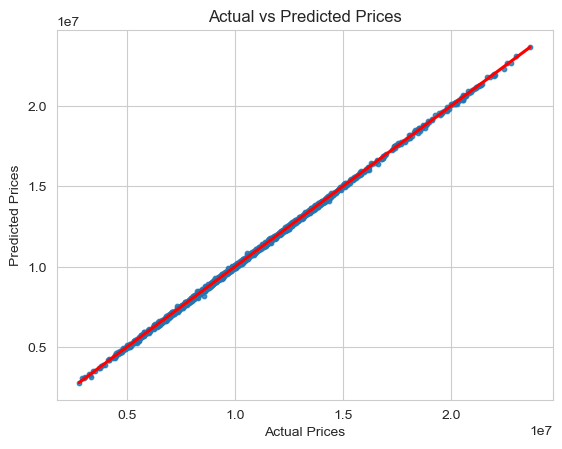

In [166]:
sns.regplot(x=y_test, y=predict, line_kws={'color':'red'}, scatter_kws={"s": 10})
plt.title(f"Actual vs Predicted Prices")
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()

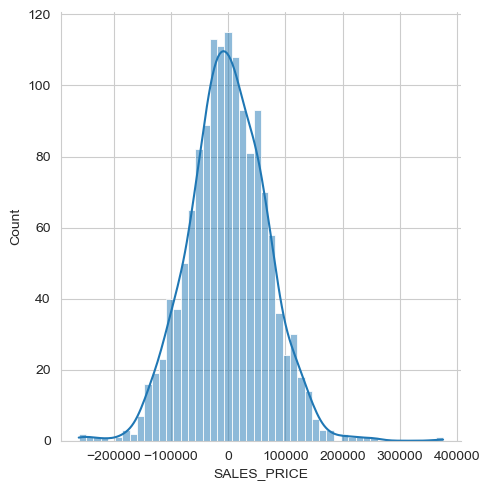

In [167]:
sns.displot((y_test-predict),bins=50, kde=True)

# I achieved 99 percent in other words the error rate is 1 percent